In [305]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.io.sql import PandasSQL
from pandasql import sqldf
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn. model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [36]:
game_data=pd.read_csv("D://SML//Data//games.grivg.csv")
characters_data=pd.read_csv("D://SML//Data//characters.grivg.csv")

In [39]:
characters_data.dropna(axis='rows',inplace=True)
characters_data=characters_data.drop(characters_data.columns[-1],axis=1)
# len(characters_data.isnull())
# characters_data[characters_data.isnull()].index.tolist()
characters_data[(characters_data.isnull())].columns
labelEncoder=LabelEncoder()

### Data Processing


In [246]:
#Combining data of both games and characters dataset
data_games=pd.read_csv("D://SML//Data//games.grivg.csv")
data_characters=pd.read_csv("D://SML//Data//characters.grivg.csv")
pysqldf = lambda q: sqldf(q, globals())
query_1 = 'SELECT * \
         FROM data_characters AS c\
         LEFT JOIN data_games AS g\
         ON  c.Game = g.Game_Id'
data1 = pysqldf(query_1)


In [247]:
len(data1.columns)

40

In [248]:
data1=data1.drop(columns=['Name','Id','Age','Game_Id','Sub-genre','Title','Developer','Unnamed: 27','Metacritic ', 'Destructoid', 'IGN', 'GameSpot','Release'])


In [249]:
len(data1.columns)

27

In [250]:
data1['Gender']=data1['Gender'].map({'Male':0,'Female':1,'Non-binary':2,'Custom':3})
data1['Game']=labelEncoder.fit_transform(data1['Game'])
data1['Age_range']=data1['Age_range'].map({'Adult':0, 'Teenager':1, 'Elderly':2, 'Child':3, 'Young adult':4, 'Unknown':5,
       'Middle-aged':6, 'Infant':7})
data1['Species']=data1['Species'].map({'Human':0, 'Humanoid':1, 'Animated Object':2, 'Animal':3, 'Animated Plant':4,
       'Creature':5, 'Robot':6, 'Humanoid-Animal':7, 'Unknown':8, 'Android-Robot':9})
data1['Relevance']=data1['Relevance'].map({'PA':0, 'SC':1, 'MC':2, 'DA':3, 'MA':4, 'SK':5})
data1['Side']=data1['Side'].map({'P':0, 'B':1, 'A':2})
data1['Series']=labelEncoder.fit_transform(data1['Series'])
# game_data['Series']=labelEncoder.fit_transform(game_data['Series'])
data1['Genre']=data1['Genre'].map({'Action-adventure':0, 'RPG':1, 'Action':2, 'Adventure':3, 'Simulation':4,
       'Interactive Story':5})
data1['Publisher']=labelEncoder.fit_transform(data1['Publisher'])
data1['Country']=data1['Country'].map({'GBR':0, 'JPN':1, 'USA':2, 'POL':3, 'DNK':4, 'SWE':5, 'CAN':6, 'FRA':7, 'AUT':8,
       'BEL':9, 'AUS':10, 'FIN':11, 'NOR':12})
data1['Platform']=data1['Platform'].map({'Multi':0, 'Nintendo Switch':1, 'Nintendo 3DS':2, 'PS4':3, 'PS3':4,
       'Computer':5, 'Wii U':6, 'Mobile':7})
data1['Customizable_main']=data1['Customizable_main'].map({'No':0, 'Yes':1, 'Non-Binary':2})
data1['Criteria']=data1['Criteria'].map({'MS':0, 'SR':1, 'TR':2})
data1['Director']=labelEncoder.fit_transform(data1['Director'])
data1['Romantic_Interest']=labelEncoder.fit_transform(data1['Romantic_Interest'])

In [251]:
pd.set_option('display.max_columns', None)
data1.head()

,Gender,Game,Age_range,Playable,Sexualization,Species,Side,Relevance,Romantic_Interest,Series,Genre,Publisher,Country,Platform,PEGI,Customizable_main,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Percentage_non_male,Criteria,Director,Total_team,female_team,Team_percentage,Avg_Reviews
0,1,10,0,1,0,0,0,0,0,3,2,2,2,0,18,0,3,1,5,1,17%,0,1,11,0,0%,7.8
1,3,46,1,1,0,0,0,0,0,17,1,26,1,1,7,1,1,1,4,5,56%,0,1,9,1,11%,8.3
2,1,46,2,0,0,0,0,1,0,17,1,26,1,1,7,1,1,1,4,5,56%,0,1,9,1,11%,8.3
3,1,46,0,0,0,0,0,1,0,17,1,26,1,1,7,1,1,1,4,5,56%,0,1,9,1,11%,8.3
4,1,46,1,0,0,0,1,2,0,17,1,26,1,1,7,1,1,1,4,5,56%,0,1,9,1,11%,8.3


In [252]:
game_data_dummy=[str(i[:len(i)-1].strip(" ")) for i in game_data['Team_percentage']]
# game_data_dummy=[int(i) for i in game_data_dummy]
game_data_dummy=[int(i) for i in game_data_dummy]
data1['Team_percentage']=pd.Series(game_data_dummy)
game_data_dummy=[str(i[:len(i)-1].strip(" ")) for i in game_data['Percentage_non_male']]
# game_data_dummy=[int(i) for i in game_data_dummy]
game_data_dummy=[int(i) for i in game_data_dummy]
data1['Percentage_non_male']=pd.Series(game_data_dummy)
data1.head()

,Gender,Game,Age_range,Playable,Sexualization,Species,Side,Relevance,Romantic_Interest,Series,Genre,Publisher,Country,Platform,PEGI,Customizable_main,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Percentage_non_male,Criteria,Director,Total_team,female_team,Team_percentage,Avg_Reviews
0,1,10,0,1,0,0,0,0,0,3,2,2,2,0,18,0,3,1,5,1,18.0,0,1,11,0,0.0,7.8
1,3,46,1,1,0,0,0,0,0,17,1,26,1,1,7,1,1,1,4,5,56.0,0,1,9,1,11.0,8.3
2,1,46,2,0,0,0,0,1,0,17,1,26,1,1,7,1,1,1,4,5,17.0,0,1,9,1,0.0,8.3
3,1,46,0,0,0,0,0,1,0,17,1,26,1,1,7,1,1,1,4,5,29.0,0,1,9,1,0.0,8.3
4,1,46,1,0,0,0,1,2,0,17,1,26,1,1,7,1,1,1,4,5,40.0,0,1,9,1,9.0,8.3


In [253]:
#checking out for null values
for col in data1.columns:
    pct_missing = np.mean(data1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 0%
Game - 0%
Age_range - 0%
Playable - 0%
Sexualization - 0%
Species - 0%
Side - 0%
Relevance - 0%
Romantic_Interest - 0%
Series - 0%
Genre - 0%
Publisher - 0%
Country - 0%
Platform - 0%
PEGI - 0%
Customizable_main - 0%
Protagonist - 0%
Protagonist_Non_Male - 0%
Relevant_males - 0%
Relevant_no_males - 0%
Percentage_non_male - 90%
Criteria - 0%
Director - 0%
Total_team - 0%
female_team - 0%
Team_percentage - 90%
Avg_Reviews - 0%


In [254]:
#Filling NA Values
data1=data1.drop(columns=['Team_percentage','Percentage_non_male'])
data1.head()

,Gender,Game,Age_range,Playable,Sexualization,Species,Side,Relevance,Romantic_Interest,Series,Genre,Publisher,Country,Platform,PEGI,Customizable_main,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Criteria,Director,Total_team,female_team,Avg_Reviews
0,1,10,0,1,0,0,0,0,0,3,2,2,2,0,18,0,3,1,5,1,0,1,11,0,7.8
1,3,46,1,1,0,0,0,0,0,17,1,26,1,1,7,1,1,1,4,5,0,1,9,1,8.3
2,1,46,2,0,0,0,0,1,0,17,1,26,1,1,7,1,1,1,4,5,0,1,9,1,8.3
3,1,46,0,0,0,0,0,1,0,17,1,26,1,1,7,1,1,1,4,5,0,1,9,1,8.3
4,1,46,1,0,0,0,1,2,0,17,1,26,1,1,7,1,1,1,4,5,0,1,9,1,8.3


<AxesSubplot:>

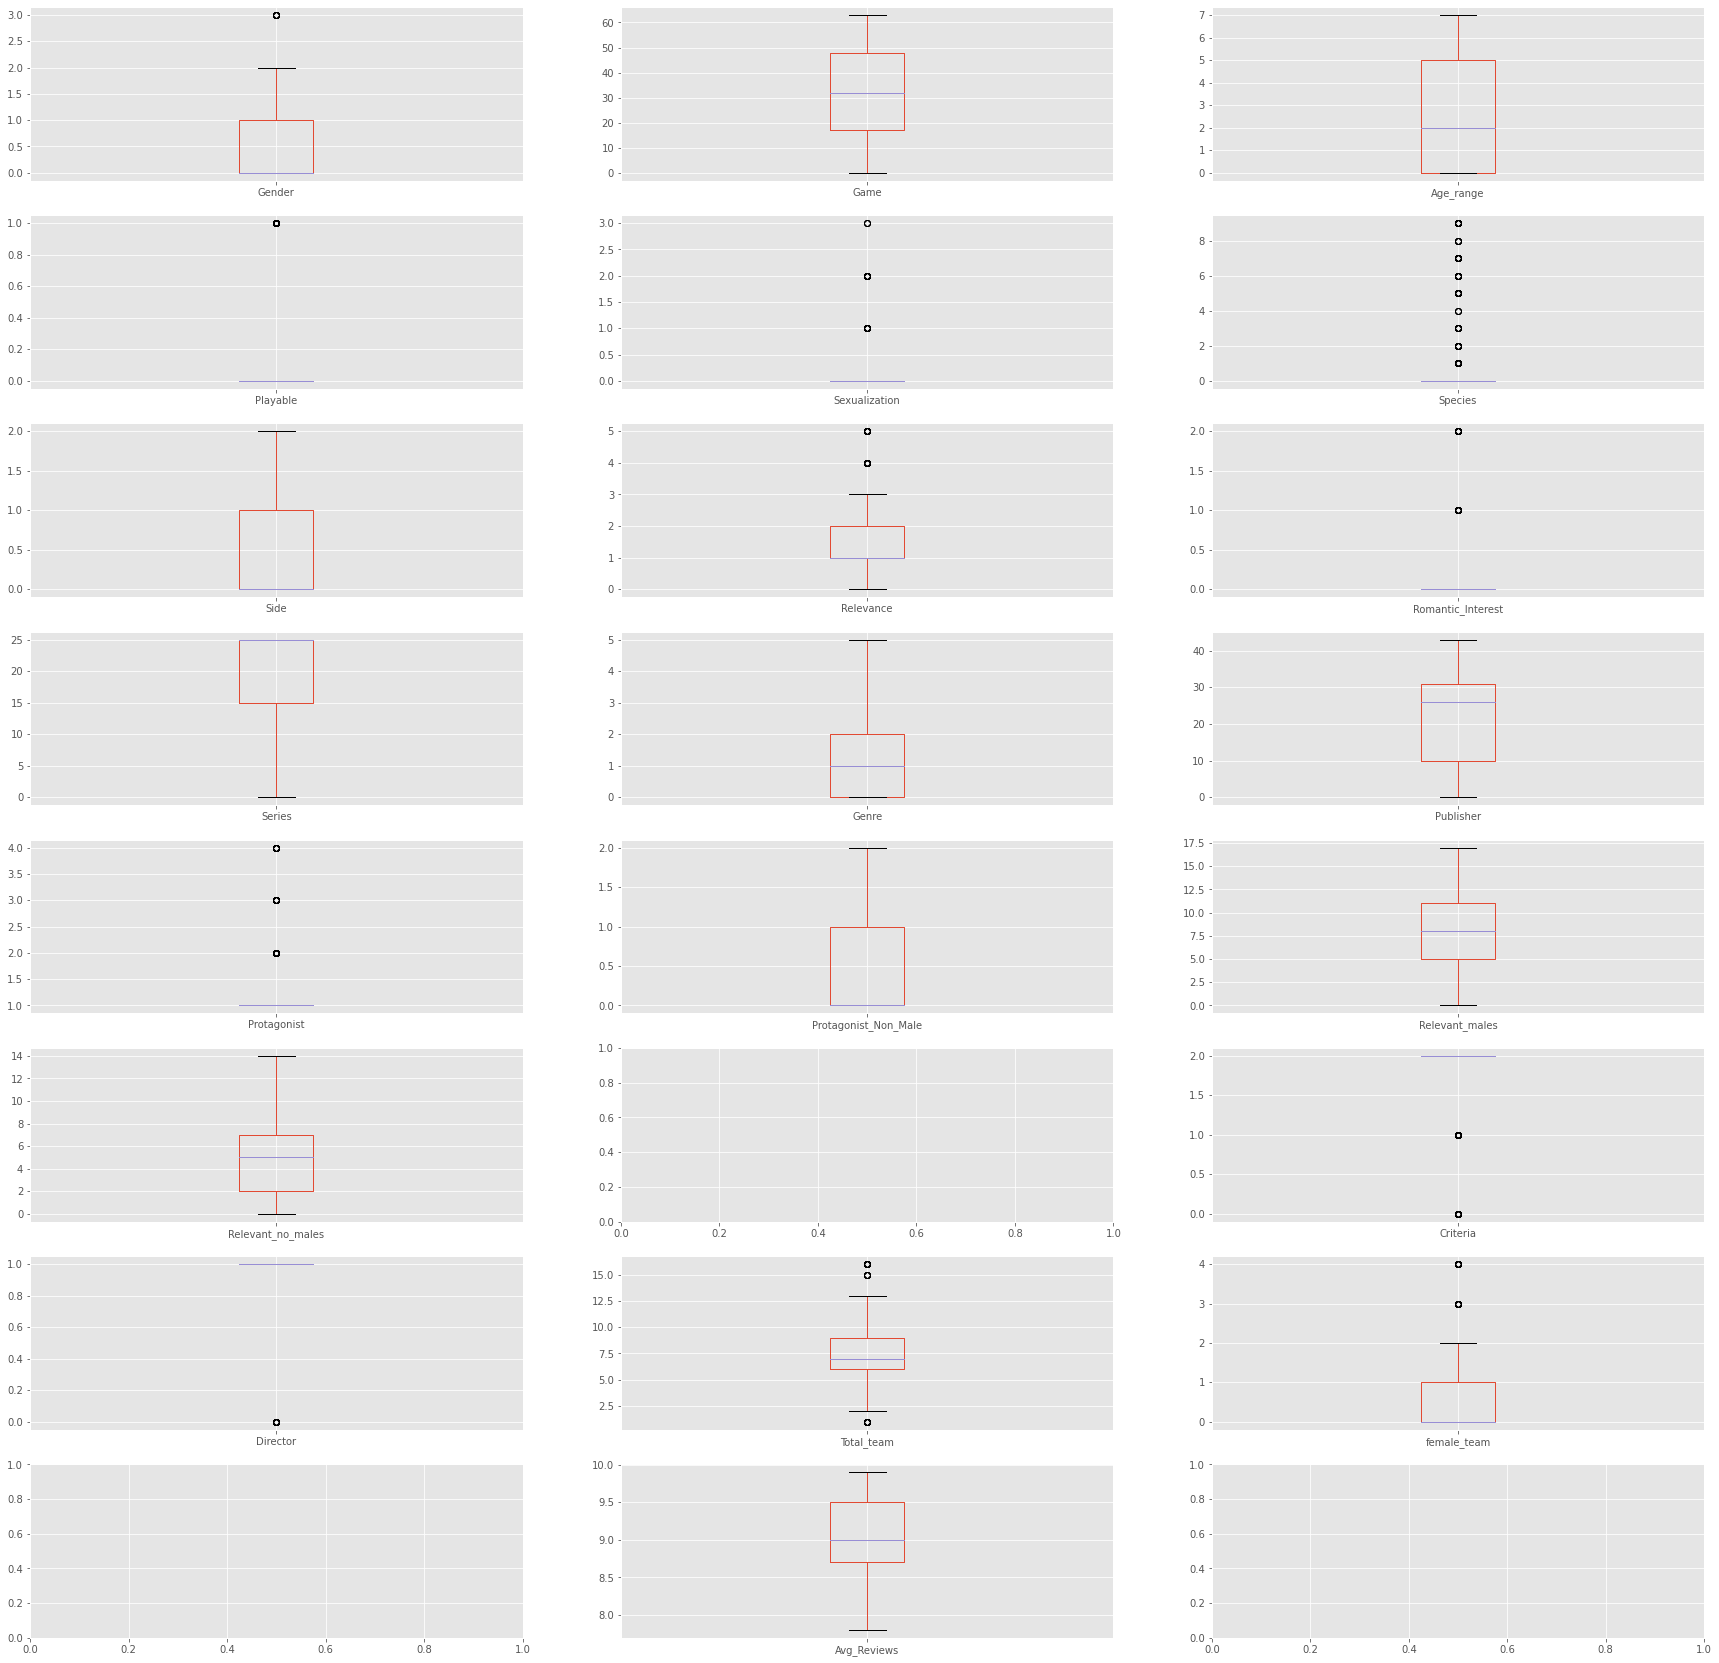

In [255]:
#checking if there is a possible existence of outliers with boxplots
fig, axes=plt.subplots(8,3,figsize=(30,30))

data1.boxplot(ax=axes[0,0],column=['Gender'])
data1.boxplot(ax=axes[0,1],column=['Game'])
data1.boxplot(ax=axes[0,2],column=['Age_range'])
data1.boxplot(ax=axes[1,0],column=['Playable'])
data1.boxplot(ax=axes[1,1],column=['Sexualization'])
data1.boxplot(ax=axes[1,2],column=['Species'])
data1.boxplot(ax=axes[2,0],column=['Side'])
data1.boxplot(ax=axes[2,1],column=['Relevance'])
data1.boxplot(ax=axes[2,2],column=['Romantic_Interest'])
data1.boxplot(ax=axes[3,0],column=['Series'])
data1.boxplot(ax=axes[3,1],column=['Genre'])
data1.boxplot(ax=axes[3,2],column=['Publisher'])
data1.boxplot(ax=axes[4,0],column=['Protagonist'])
data1.boxplot(ax=axes[4,1],column=['Protagonist_Non_Male'])
data1.boxplot(ax=axes[4,2],column=['Relevant_males'])
data1.boxplot(ax=axes[5,0],column=['Relevant_no_males'])
#data1.boxplot(ax=axes[5,1],column=['Percentage_non_male'])
data1.boxplot(ax=axes[5,2],column=['Criteria'])
data1.boxplot(ax=axes[6,0],column=['Director'])
data1.boxplot(ax=axes[6,1],column=['Total_team'])
data1.boxplot(ax=axes[6,2],column=['female_team'])
#data1.boxplot(ax=axes[7,0],column=['Team_percentage'])
data1.boxplot(ax=axes[7,1],column=['Avg_Reviews'])

In [256]:
data1.columns

Index(['Gender', 'Game', 'Age_range', 'Playable', 'Sexualization', 'Species',
       'Side', 'Relevance', 'Romantic_Interest', 'Series', 'Genre',
       'Publisher', 'Country', 'Platform', 'PEGI', 'Customizable_main',
       'Protagonist', 'Protagonist_Non_Male', 'Relevant_males',
       'Relevant_no_males', 'Criteria', 'Director', 'Total_team',
       'female_team', 'Avg_Reviews'],
      dtype='object')

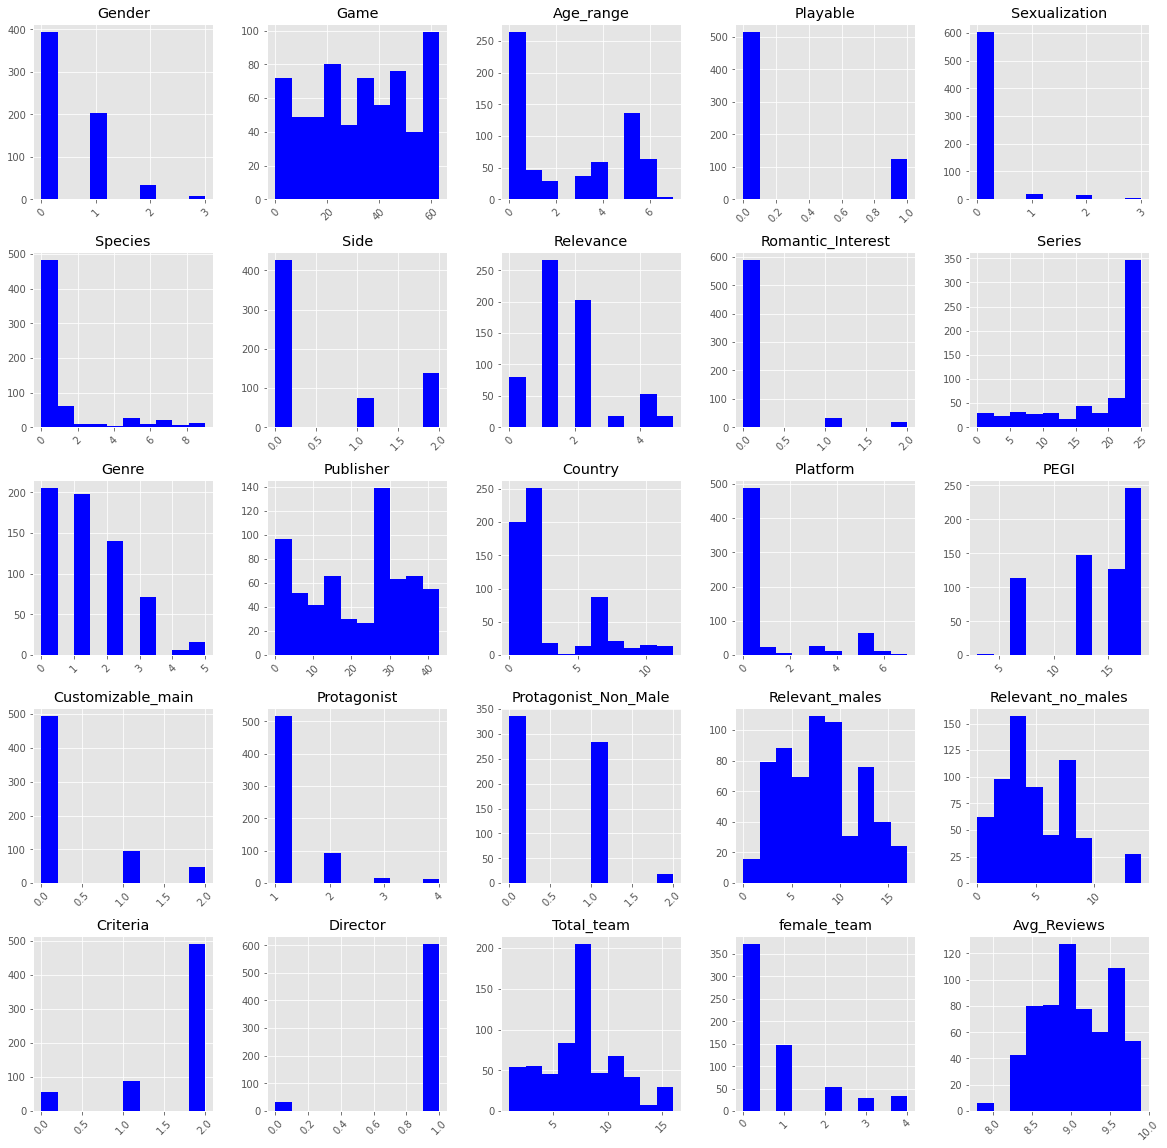

In [257]:
# Figuring out the distribution of data
data1.hist(figsize=(20,20), xrot=45, color='blue')
plt.show()

In [258]:
#checking out the data type and scraping in for categorical variable
data1.dtypes

Gender                    int64
Game                      int32
Age_range                 int64
Playable                  int64
Sexualization             int64
Species                   int64
Side                      int64
Relevance                 int64
Romantic_Interest         int32
Series                    int32
Genre                     int64
Publisher                 int32
Country                   int64
Platform                  int64
PEGI                      int64
Customizable_main         int64
Protagonist               int64
Protagonist_Non_Male      int64
Relevant_males            int64
Relevant_no_males         int64
Criteria                  int64
Director                  int32
Total_team                int64
female_team               int64
Avg_Reviews             float64
dtype: object

In [259]:
#Checking out the distribution of values 
data1.describe()

,Gender,Game,Age_range,Playable,Sexualization,Species,Side,Relevance,Romantic_Interest,Series,Genre,Publisher,Country,Platform,PEGI,Customizable_main,Protagonist,Protagonist_Non_Male,Relevant_males,Relevant_no_males,Criteria,Director,Total_team,female_team,Avg_Reviews
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.459969,32.616954,2.401884,0.193093,0.086342,0.946625,0.546311,1.610675,0.102041,19.150706,1.252747,21.631083,3.073783,0.902669,14.191523,0.301413,1.254317,0.500785,8.105181,4.929356,1.681319,0.948195,7.335950,0.753532,9.050863
std,0.654243,18.924732,2.372244,0.395035,0.389022,2.176268,0.824053,1.177253,0.381093,7.826291,1.191102,12.652982,2.777813,1.811895,4.128562,0.604138,0.597164,0.554072,4.056200,3.076034,0.629849,0.221808,3.373991,1.130136,0.451399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.800000
25%,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,10.000000,1.000000,0.000000,12.000000,0.000000,1.000000,0.000000,5.000000,2.000000,2.000000,1.000000,6.000000,0.000000,8.700000
50%,0.000000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000,26.000000,2.000000,0.000000,16.000000,0.000000,1.000000,0.000000,8.000000,5.000000,2.000000,1.000000,7.000000,0.000000,9.000000
75%,1.000000,48.000000,5.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,25.000000,2.000000,31.000000,5.000000,0.000000,18.000000,0.000000,1.000000,1.000000,11.000000,7.000000,2.000000,1.000000,9.000000,1.000000,9.500000
max,3.000000,63.000000,7.000000,1.000000,3.000000,9.000000,2.000000,5.000000,2.000000,25.000000,5.000000,43.000000,12.000000,7.000000,18.000000,2.000000,4.000000,2.000000,17.000000,14.000000,2.000000,1.000000,16.000000,4.000000,9.900000


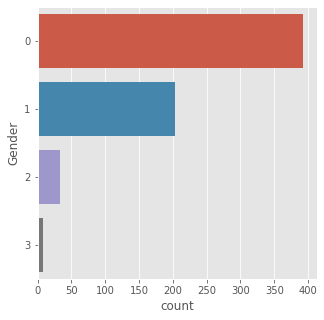

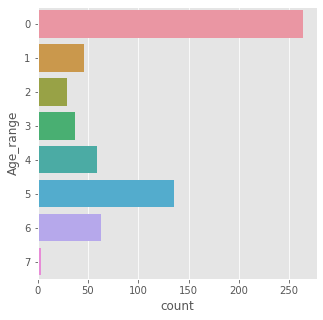

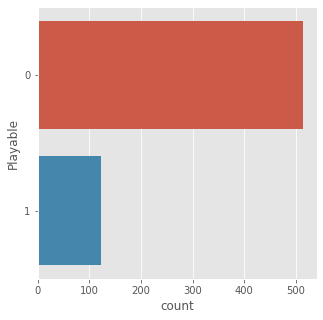

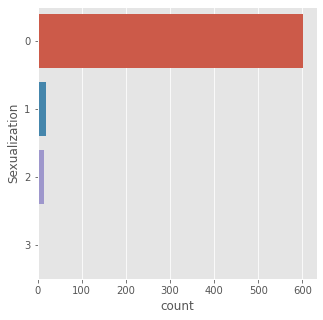

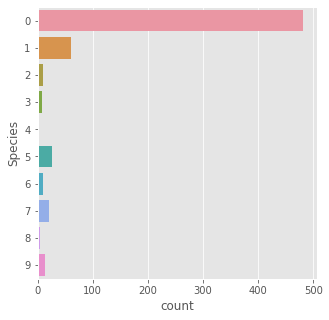

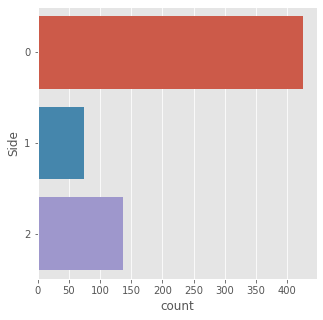

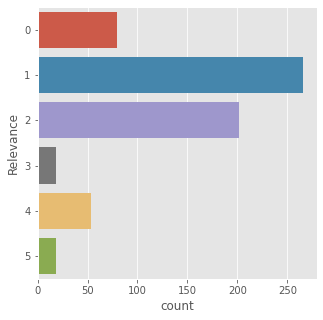

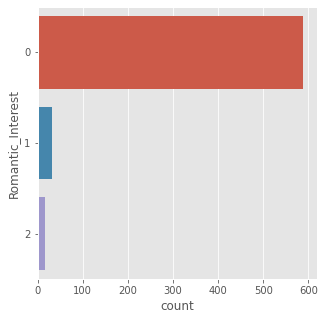

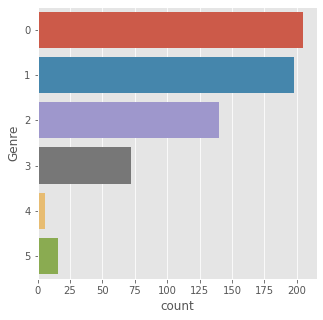

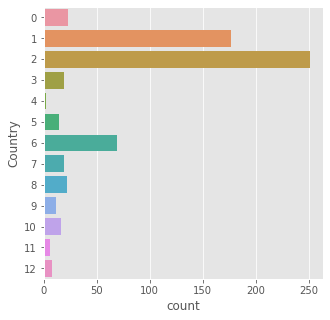

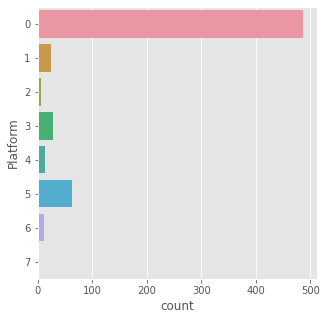

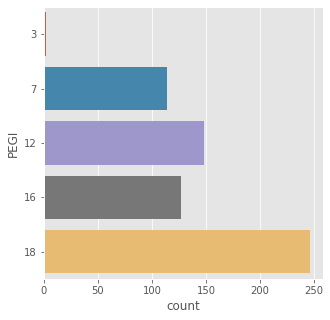

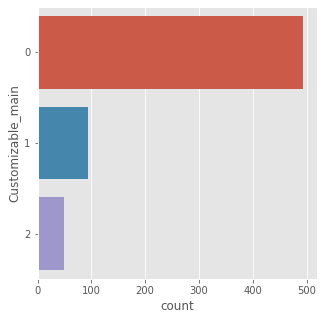

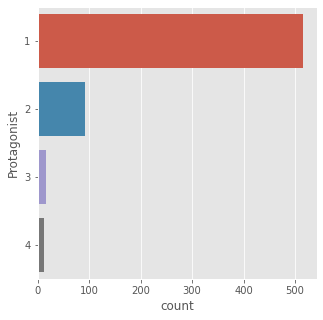

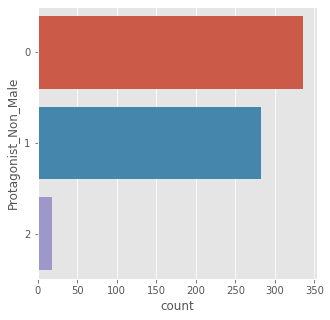

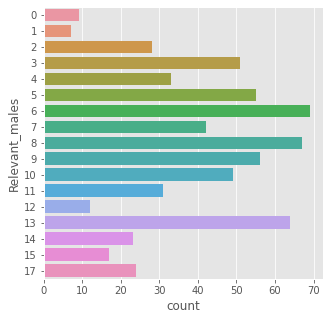

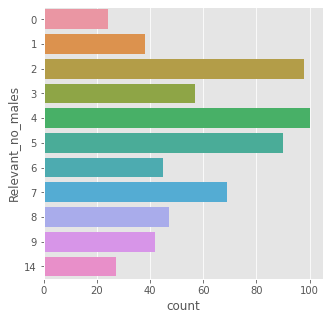

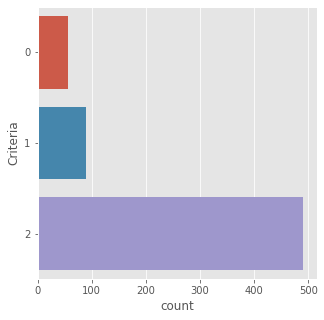

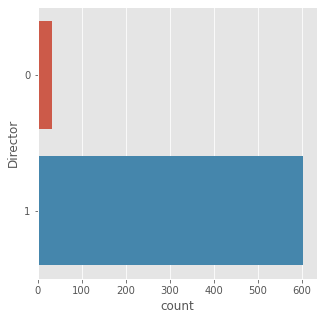

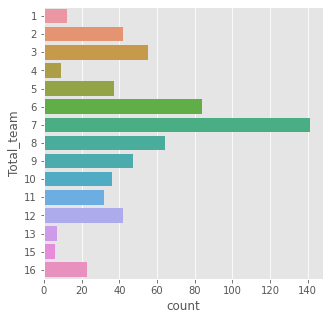

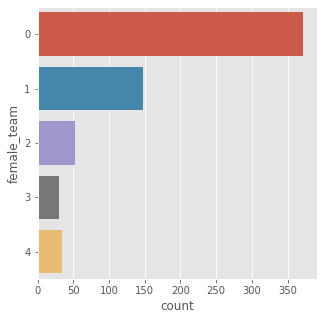

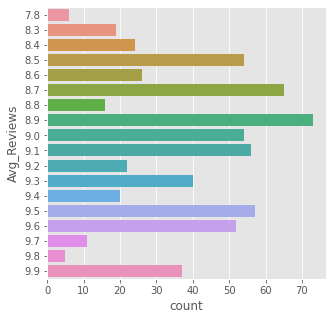

In [260]:
#Checking out the distribution of values using boxplot
for col in data1.columns:
    if data1[col].nunique() <= 22:
        plt.figure(figsize=(5,5))
        sns.countplot(y=col, data=data1)
        plt.show()

In [261]:
#Cross_tabulation table which features the relationship between all the features and the target variables
for col in data1.columns:
    if data1[col].nunique() <=12:
        display(pd.crosstab(data1['Relevance'],data1[col], normalize='index'))

Gender,0,1,2,3
Relevance,,,,
0,0.562500,0.200000,0.137500,0.1
1,0.650376,0.315789,0.033835,0.0
2,0.594059,0.386139,0.019802,0.0
3,0.555556,0.444444,0.000000,0.0
4,0.716981,0.207547,0.075472,0.0
5,0.388889,0.333333,0.277778,0.0


Age_range,0,1,2,3,4,5,6,7
Relevance,,,,,,,,
0,0.437500,0.150000,0.000000,0.050000,0.112500,0.200000,0.050000,0.000000
1,0.458647,0.026316,0.071429,0.063910,0.082707,0.187970,0.097744,0.011278
2,0.410891,0.103960,0.049505,0.059406,0.103960,0.168317,0.103960,0.000000
3,0.111111,0.222222,0.000000,0.222222,0.277778,0.055556,0.111111,0.000000
4,0.358491,0.000000,0.000000,0.000000,0.018868,0.452830,0.169811,0.000000
5,0.166667,0.111111,0.000000,0.000000,0.055556,0.611111,0.055556,0.000000


Playable,0,1
Relevance,,
0,0.025000,0.975000
1,0.958647,0.041353
2,0.876238,0.123762
3,0.722222,0.277778
4,0.981132,0.018868
5,0.833333,0.166667


Sexualization,0,1,2,3
Relevance,,,,
0,0.950000,0.025000,0.025000,0.000000
1,0.947368,0.030075,0.015038,0.007519
2,0.940594,0.029703,0.024752,0.004950
3,0.722222,0.111111,0.166667,0.000000
4,1.000000,0.000000,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000


Species,0,1,2,3,4,5,6,7,8,9
Relevance,,,,,,,,,,
0,0.812500,0.050000,0.025000,0.000000,0.000000,0.037500,0.000000,0.037500,0.025000,0.012500
1,0.770677,0.093985,0.015038,0.011278,0.007519,0.052632,0.015038,0.030075,0.000000,0.003759
2,0.767327,0.123762,0.004950,0.004950,0.004950,0.009901,0.009901,0.034653,0.000000,0.039604
3,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.111111
4,0.641509,0.113208,0.000000,0.018868,0.000000,0.094340,0.037736,0.018868,0.056604,0.018868
5,0.444444,0.000000,0.166667,0.166667,0.000000,0.111111,0.055556,0.055556,0.000000,0.000000


Side,0,1,2
Relevance,,,
0,0.937500,0.062500,0.000000
1,0.676692,0.116541,0.206767
2,0.663366,0.173267,0.163366
3,0.944444,0.055556,0.000000
4,0.037736,0.037736,0.924528
5,1.000000,0.000000,0.000000


Relevance,0,1,2,3,4,5
Relevance,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0


Romantic_Interest,0,1,2
Relevance,,,
0,0.975000,0.000000,0.025000
1,0.969925,0.007519,0.022556
2,0.821782,0.138614,0.039604
3,0.888889,0.055556,0.055556
4,1.000000,0.000000,0.000000
5,1.000000,0.000000,0.000000


Genre,0,1,2,3,4,5
Relevance,,,,,,
0,0.337500,0.200000,0.300000,0.087500,0.012500,0.062500
1,0.327068,0.289474,0.210526,0.142857,0.015038,0.015038
2,0.282178,0.391089,0.198020,0.108911,0.004950,0.014851
3,0.388889,0.388889,0.055556,0.055556,0.000000,0.111111
4,0.339623,0.245283,0.301887,0.075472,0.000000,0.037736
5,0.500000,0.333333,0.166667,0.000000,0.000000,0.000000


Platform,0,1,2,3,4,5,6,7
Relevance,,,,,,,,
0,0.762500,0.037500,0.012500,0.050000,0.025000,0.087500,0.012500,0.012500
1,0.789474,0.030075,0.007519,0.045113,0.030075,0.090226,0.007519,0.000000
2,0.737624,0.039604,0.014851,0.044554,0.004950,0.123762,0.034653,0.000000
3,0.777778,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.055556
4,0.735849,0.056604,0.018868,0.037736,0.018868,0.113208,0.018868,0.000000
5,0.777778,0.111111,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000


PEGI,3,7,12,16,18
Relevance,,,,,
0,0.012500,0.212500,0.175000,0.175000,0.425000
1,0.000000,0.165414,0.218045,0.187970,0.428571
2,0.000000,0.148515,0.311881,0.222772,0.316832
3,0.055556,0.111111,0.055556,0.111111,0.666667
4,0.000000,0.283019,0.188679,0.188679,0.339623
5,0.000000,0.333333,0.111111,0.333333,0.222222


Customizable_main,0,1,2
Relevance,,,
0,0.812500,0.100000,0.087500
1,0.763158,0.172932,0.063910
2,0.762376,0.148515,0.089109
3,0.944444,0.055556,0.000000
4,0.792453,0.113208,0.094340
5,0.722222,0.166667,0.111111


Protagonist,1,2,3,4
Relevance,,,,
0,0.650000,0.225000,0.075000,0.050000
1,0.796992,0.169173,0.018797,0.015038
2,0.871287,0.099010,0.014851,0.014851
3,0.833333,0.166667,0.000000,0.000000
4,0.849057,0.094340,0.037736,0.018868
5,0.888889,0.055556,0.055556,0.000000


Protagonist_Non_Male,0,1,2
Relevance,,,
0,0.475000,0.475000,0.050000
1,0.556391,0.413534,0.030075
2,0.490099,0.480198,0.029703
3,0.722222,0.277778,0.000000
4,0.566038,0.433962,0.000000
5,0.444444,0.555556,0.000000


Relevant_no_males,0,1,2,3,4,5,6,7,8,9,14
Relevance,,,,,,,,,,,
0,0.062500,0.125000,0.225000,0.100000,0.200000,0.112500,0.037500,0.062500,0.037500,0.025000,0.012500
1,0.026316,0.041353,0.150376,0.086466,0.101504,0.139098,0.075188,0.127820,0.071429,0.120301,0.060150
2,0.034653,0.034653,0.118812,0.079208,0.212871,0.158416,0.084158,0.123762,0.084158,0.019802,0.049505
3,0.000000,0.222222,0.166667,0.111111,0.055556,0.111111,0.055556,0.000000,0.222222,0.055556,0.000000
4,0.075472,0.094340,0.188679,0.113208,0.207547,0.113208,0.056604,0.075472,0.037736,0.037736,0.000000
5,0.055556,0.055556,0.166667,0.111111,0.111111,0.222222,0.055556,0.055556,0.111111,0.055556,0.000000


Criteria,0,1,2
Relevance,,,
0,0.175000,0.062500,0.762500
1,0.082707,0.210526,0.706767
2,0.064356,0.084158,0.851485
3,0.055556,0.166667,0.777778
4,0.113208,0.113208,0.773585
5,0.055556,0.111111,0.833333


Director,0,1
Relevance,,
0,0.025000,0.975000
1,0.063910,0.936090
2,0.059406,0.940594
3,0.000000,1.000000
4,0.018868,0.981132
5,0.055556,0.944444


female_team,0,1,2,3,4
Relevance,,,,,
0,0.587500,0.237500,0.100000,0.037500,0.037500
1,0.639098,0.203008,0.045113,0.041353,0.071429
2,0.495050,0.257426,0.138614,0.049505,0.059406
3,0.722222,0.222222,0.055556,0.000000,0.000000
4,0.622642,0.245283,0.075472,0.056604,0.000000
5,0.500000,0.333333,0.000000,0.166667,0.000000


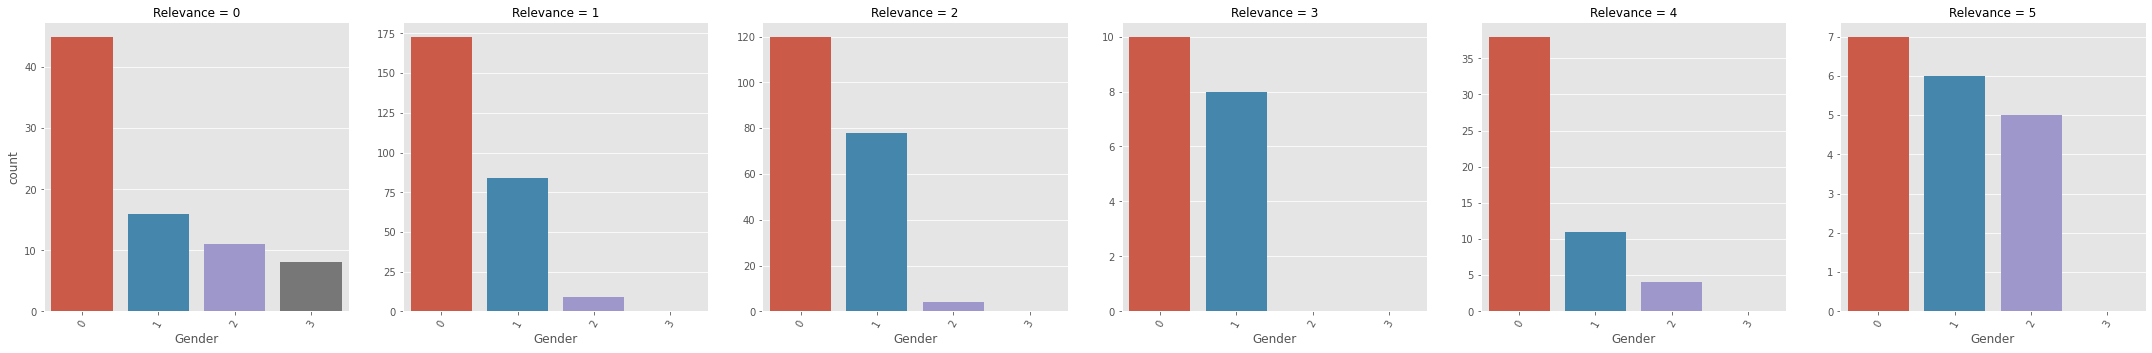

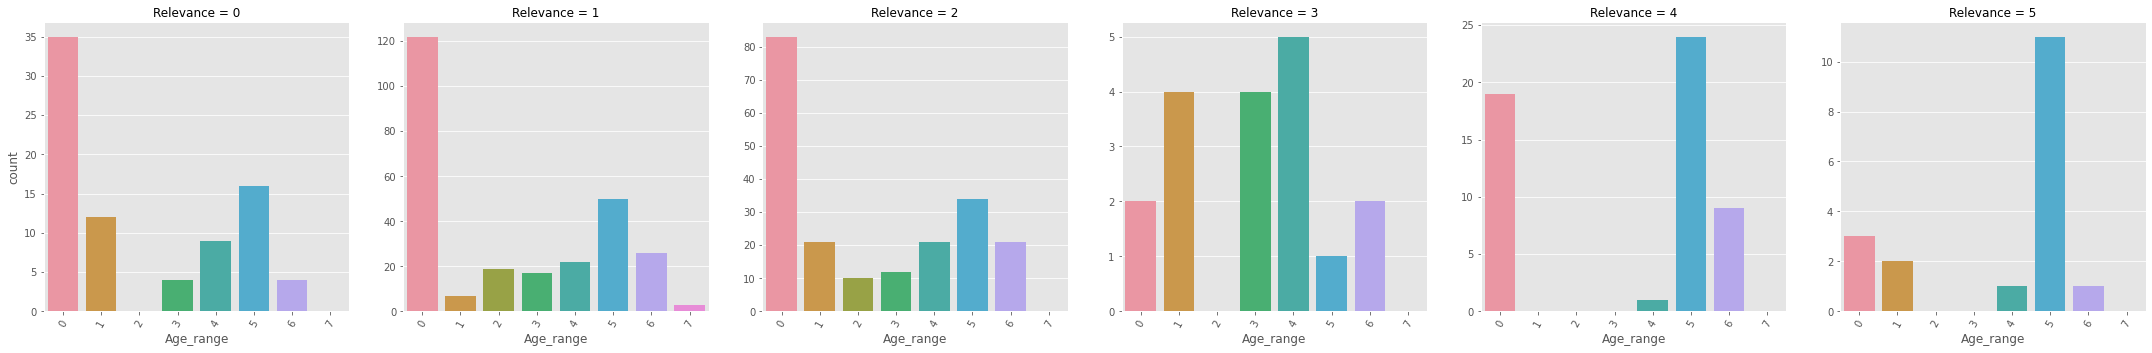

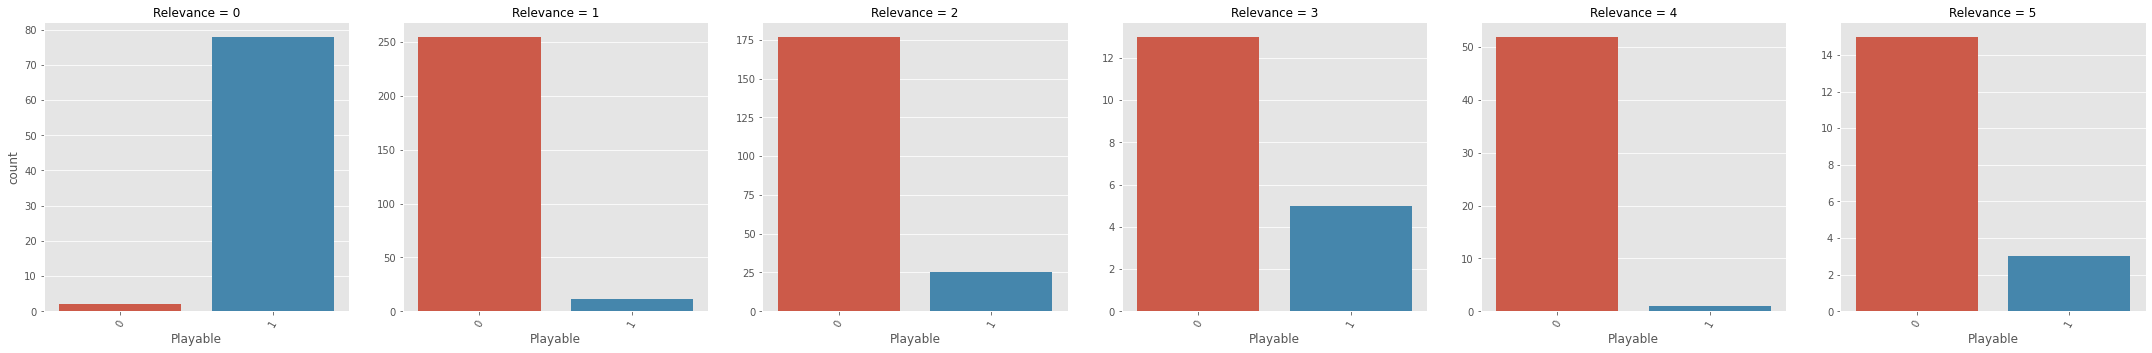

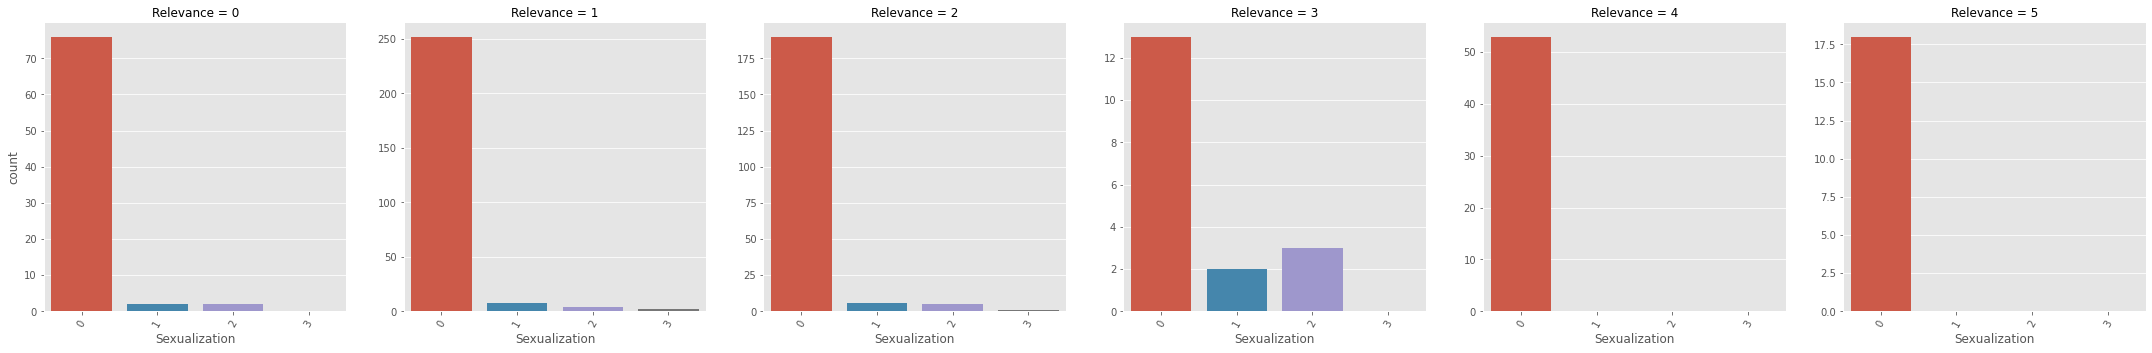

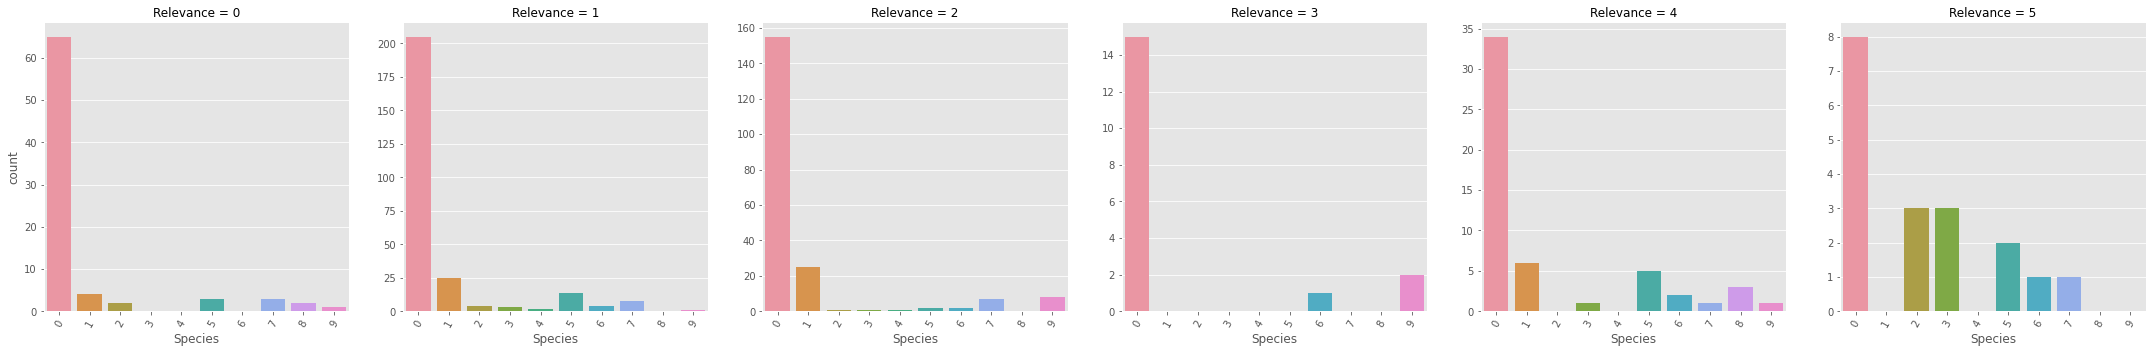

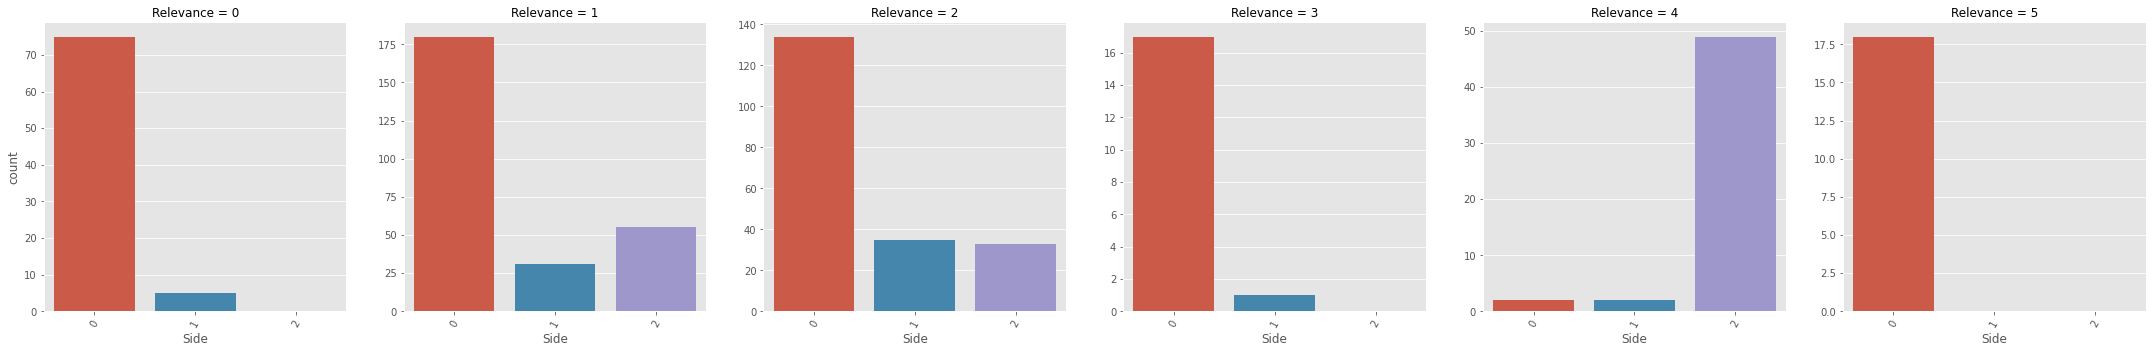

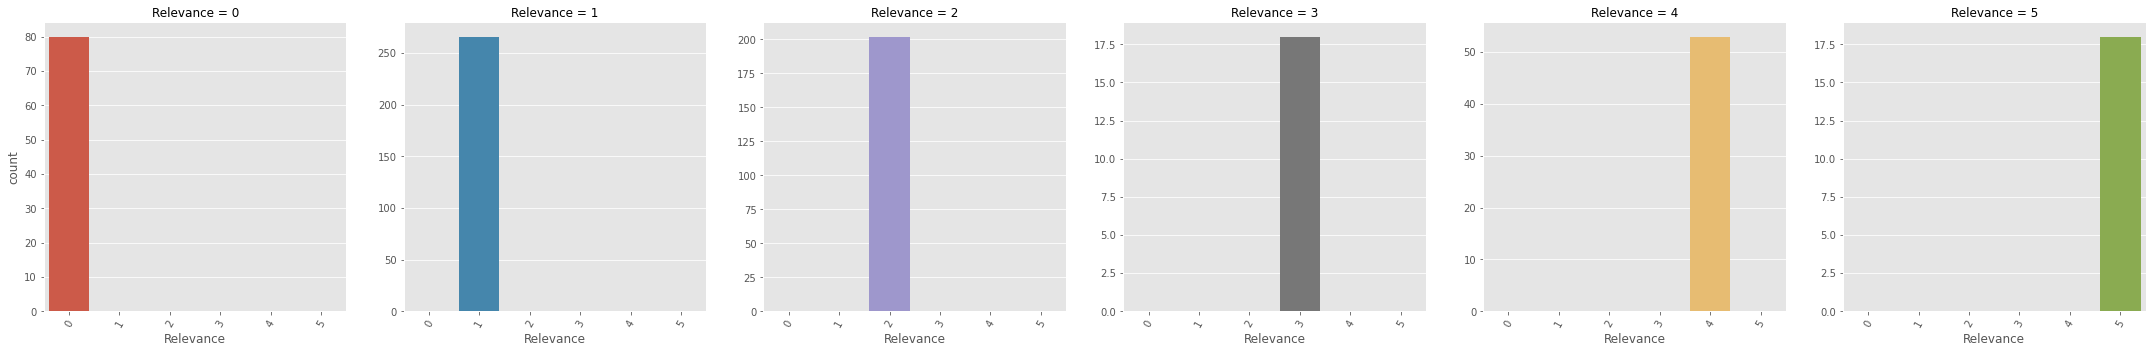

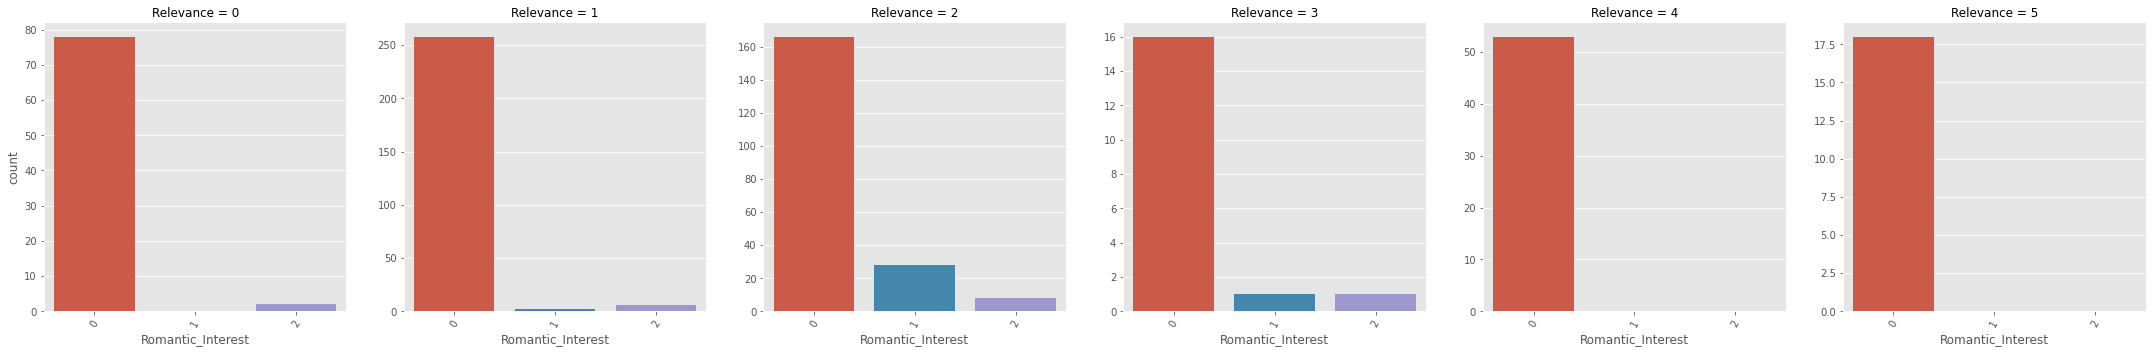

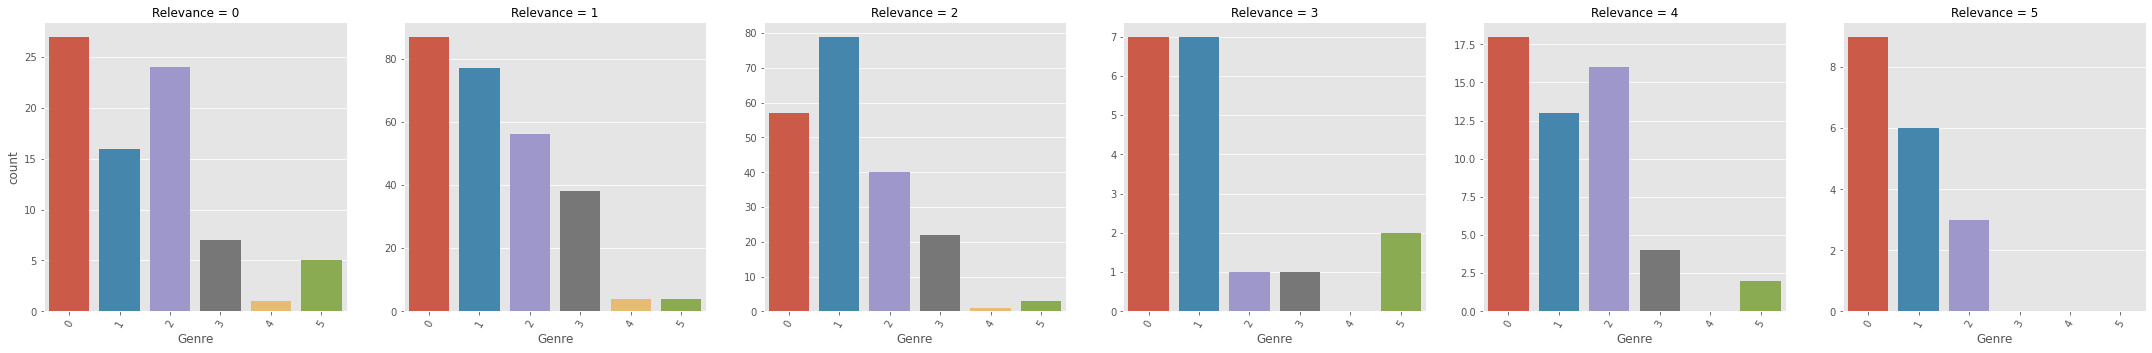

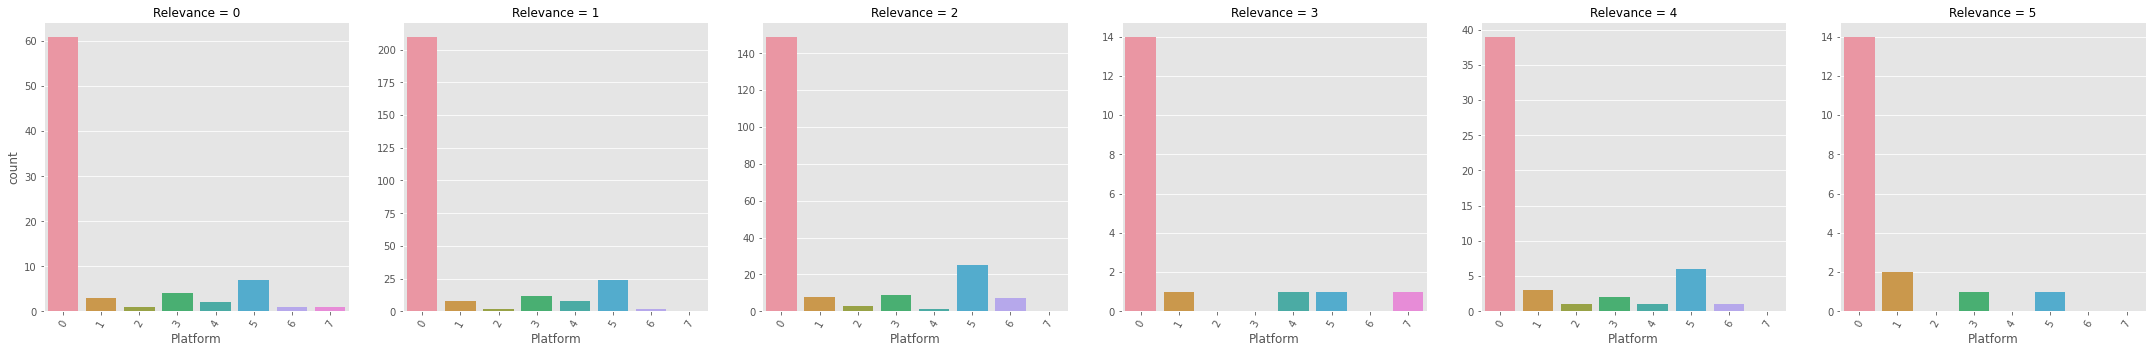

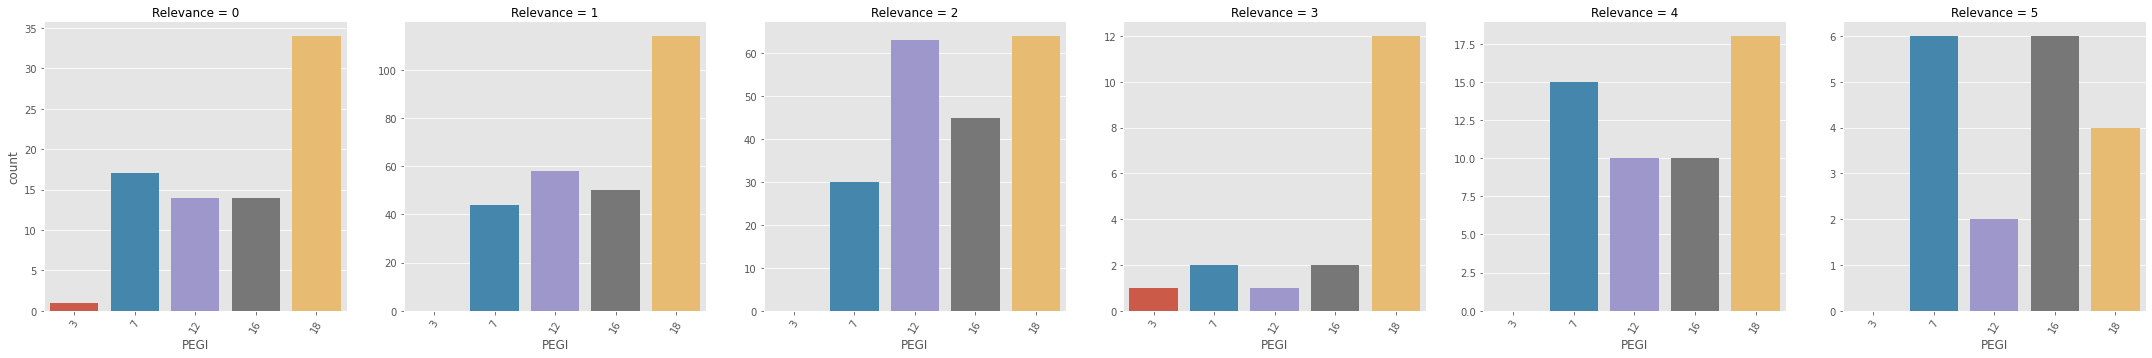

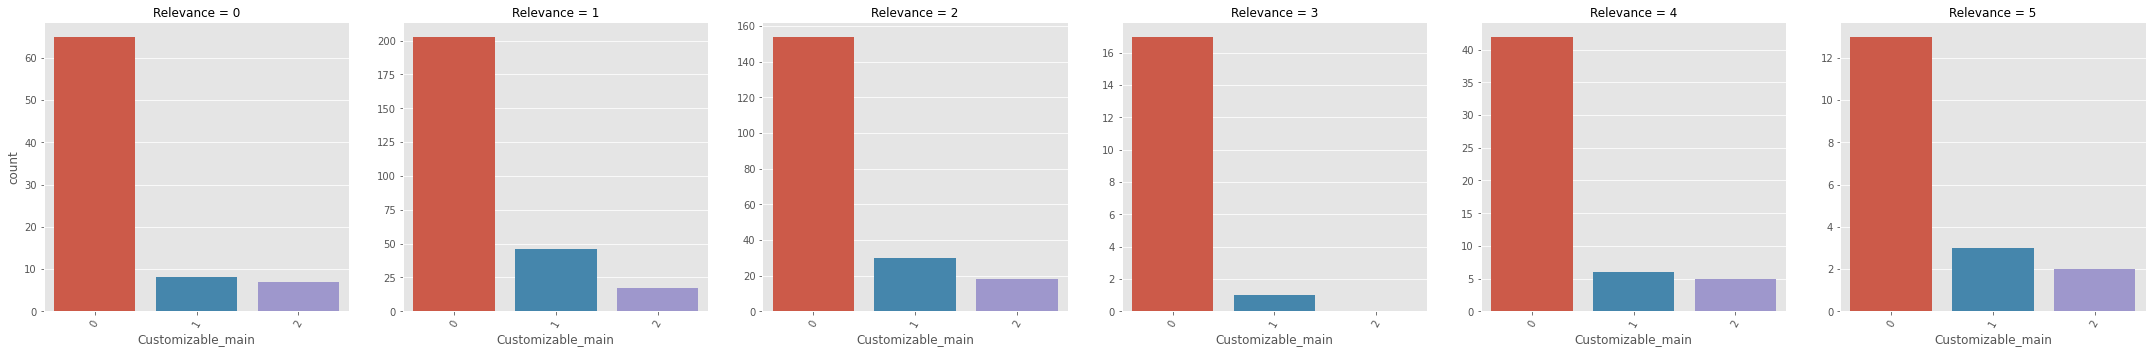

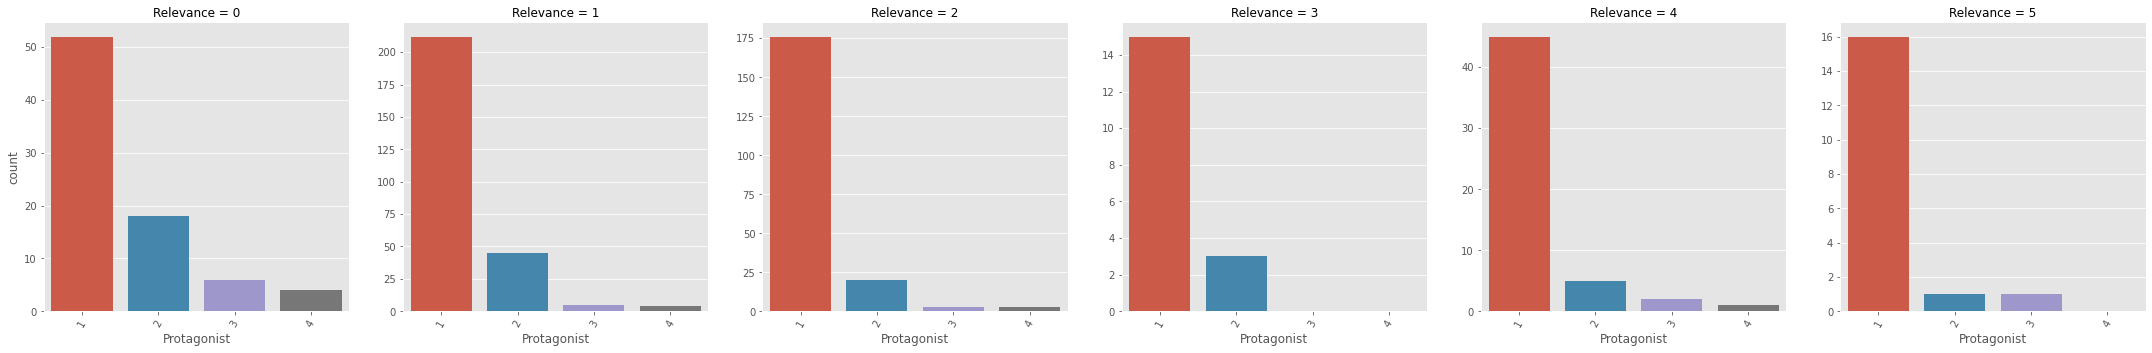

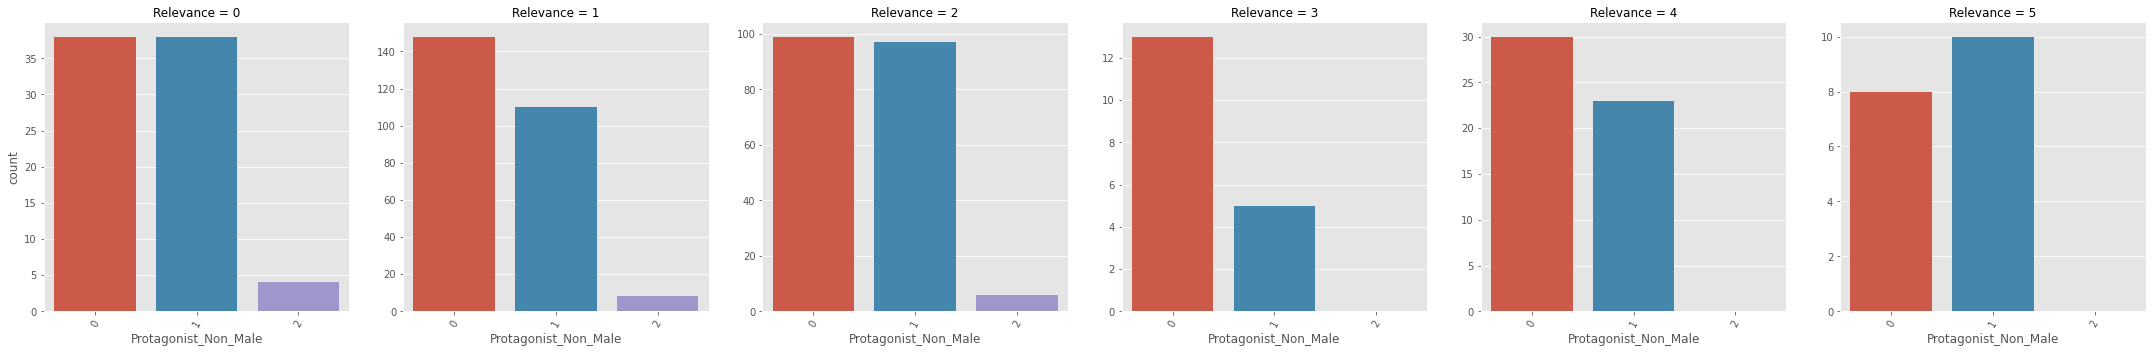

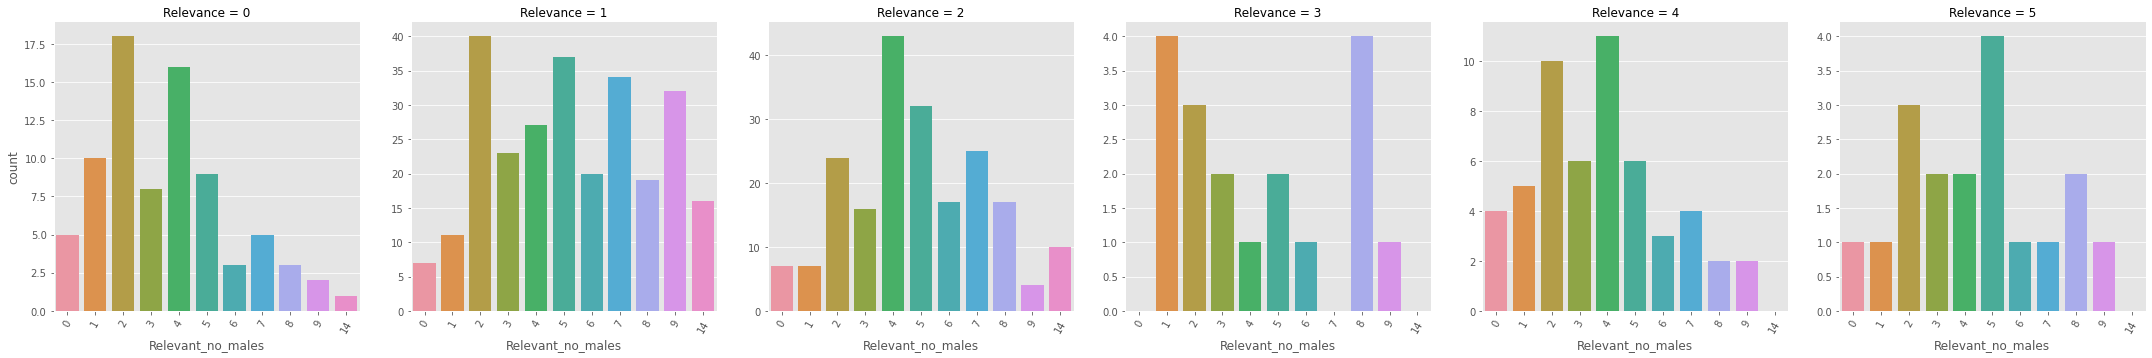

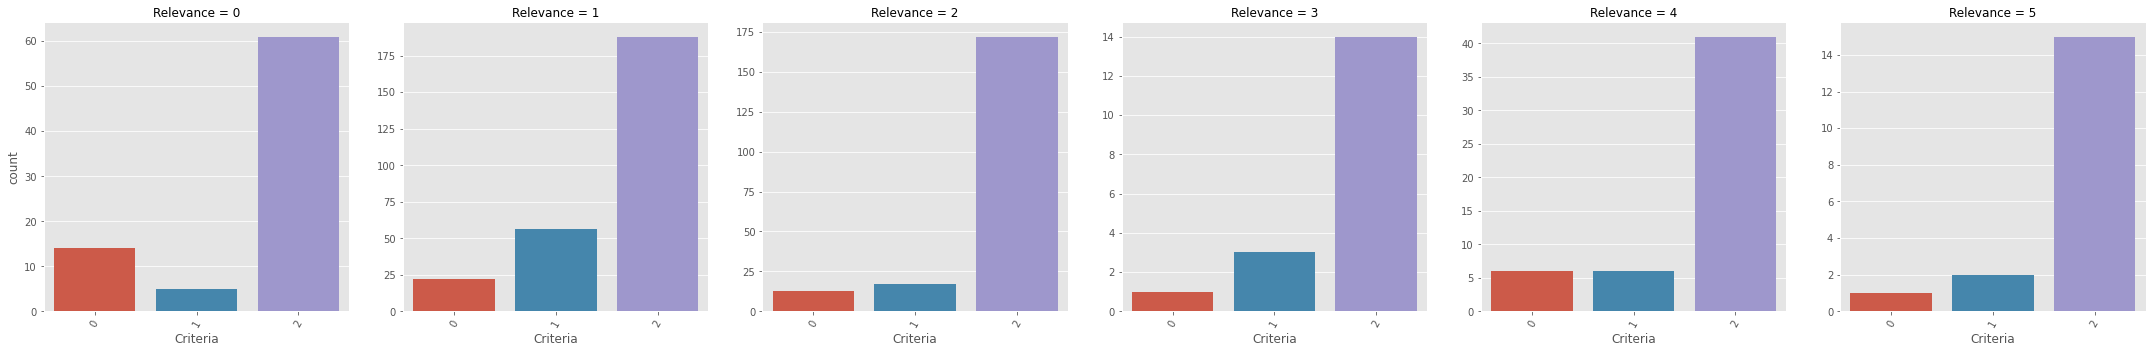

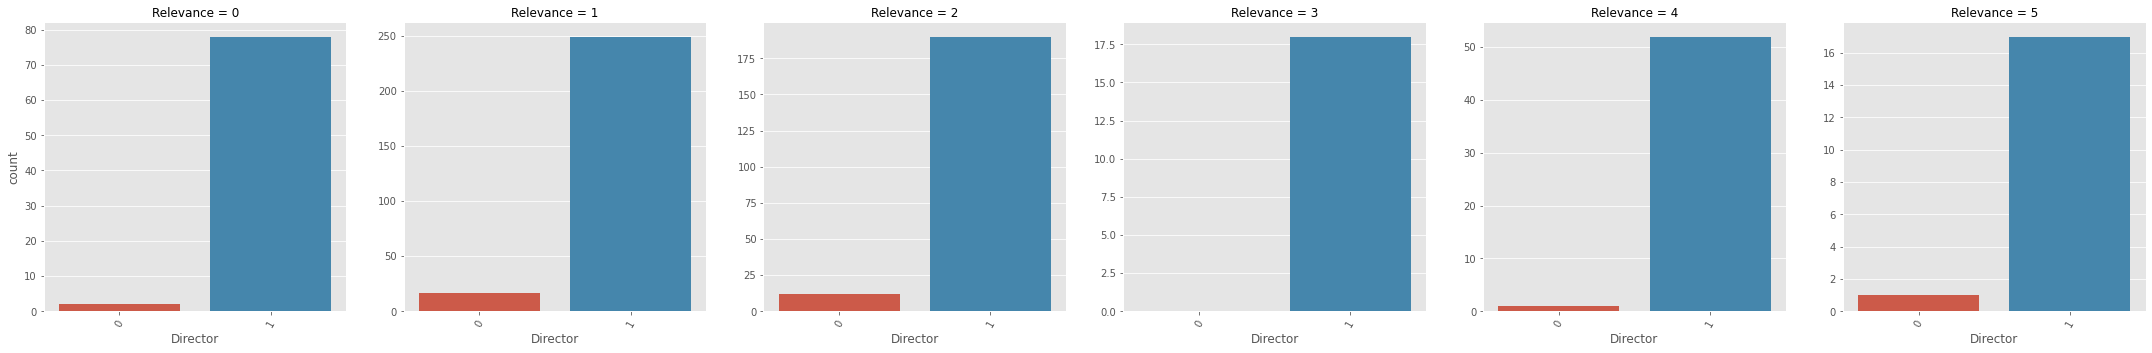

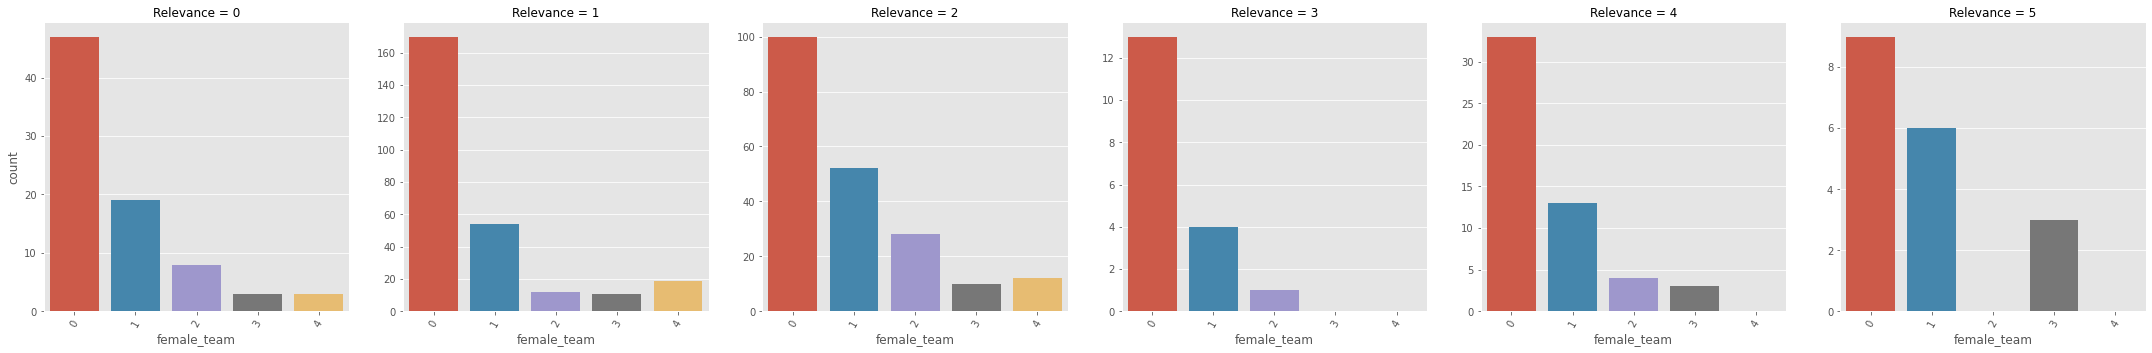

In [262]:
#Looking out for categorical variables that significantly change with the target classes.
for col in data1.columns:
    if data1[col].nunique() <=12:
        g = sns.catplot(x = col, kind='count', col = 'Relevance', data=data1, sharey=False)
        g.set_xticklabels(rotation=60)

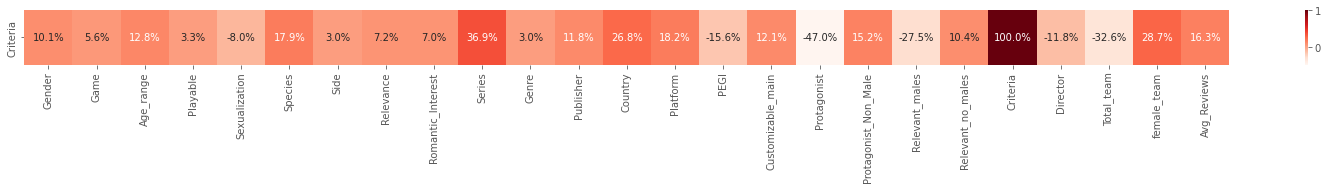

In [263]:
# Let us now identify the correlation of the distribution
corr=data1.corr()
plt.figure(figsize=(27,1))
sns.heatmap(corr[['Criteria']].T, annot=True, fmt='.01%',cmap='Reds')
plt.show()

In [264]:
data1['Criteria']

0      0
1      0
2      0
3      0
4      0
      ..
632    2
633    2
634    2
635    2
636    2
Name: Criteria, Length: 637, dtype: int64

Text(0, 0.5, 'PC2')

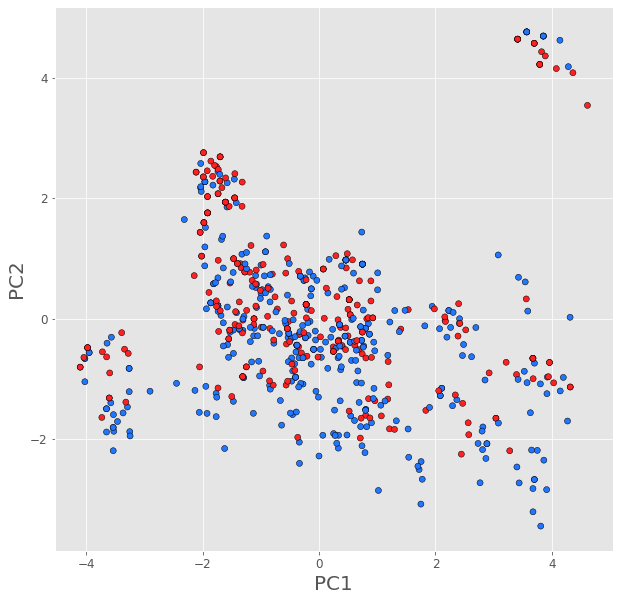

In [265]:
#PCA Analysis of Data for understanding Data Variance

scaler = StandardScaler()
scaler.fit(data1)
scaled = scaler.transform(data1)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in data1['Relevance']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Proportion of Variance Explained')

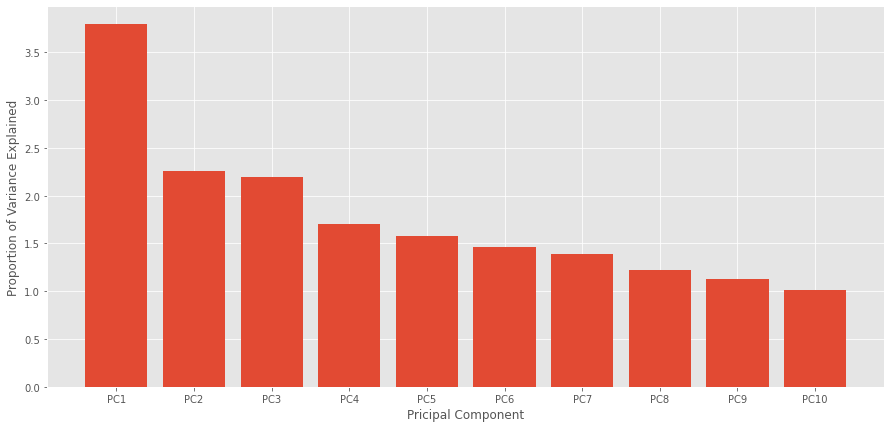

In [266]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

array([[<AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Game', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age_range', ylabel='Gender'>,
        <AxesSubplot:xlabel='Playable', ylabel='Gender'>,
        <AxesSubplot:xlabel='Sexualization', ylabel='Gender'>,
        <AxesSubplot:xlabel='Species', ylabel='Gender'>,
        <AxesSubplot:xlabel='Side', ylabel='Gender'>,
        <AxesSubplot:xlabel='Relevance', ylabel='Gender'>,
        <AxesSubplot:xlabel='Romantic_Interest', ylabel='Gender'>,
        <AxesSubplot:xlabel='Series', ylabel='Gender'>,
        <AxesSubplot:xlabel='Genre', ylabel='Gender'>,
        <AxesSubplot:xlabel='Publisher', ylabel='Gender'>,
        <AxesSubplot:xlabel='Country', ylabel='Gender'>,
        <AxesSubplot:xlabel='Platform', ylabel='Gender'>,
        <AxesSubplot:xlabel='PEGI', ylabel='Gender'>,
        <AxesSubplot:xlabel='Customizable_main', ylabel='Gender'>,
        <AxesSubplot:xlabel='Protagonist', ylabel='Gender'>,
      

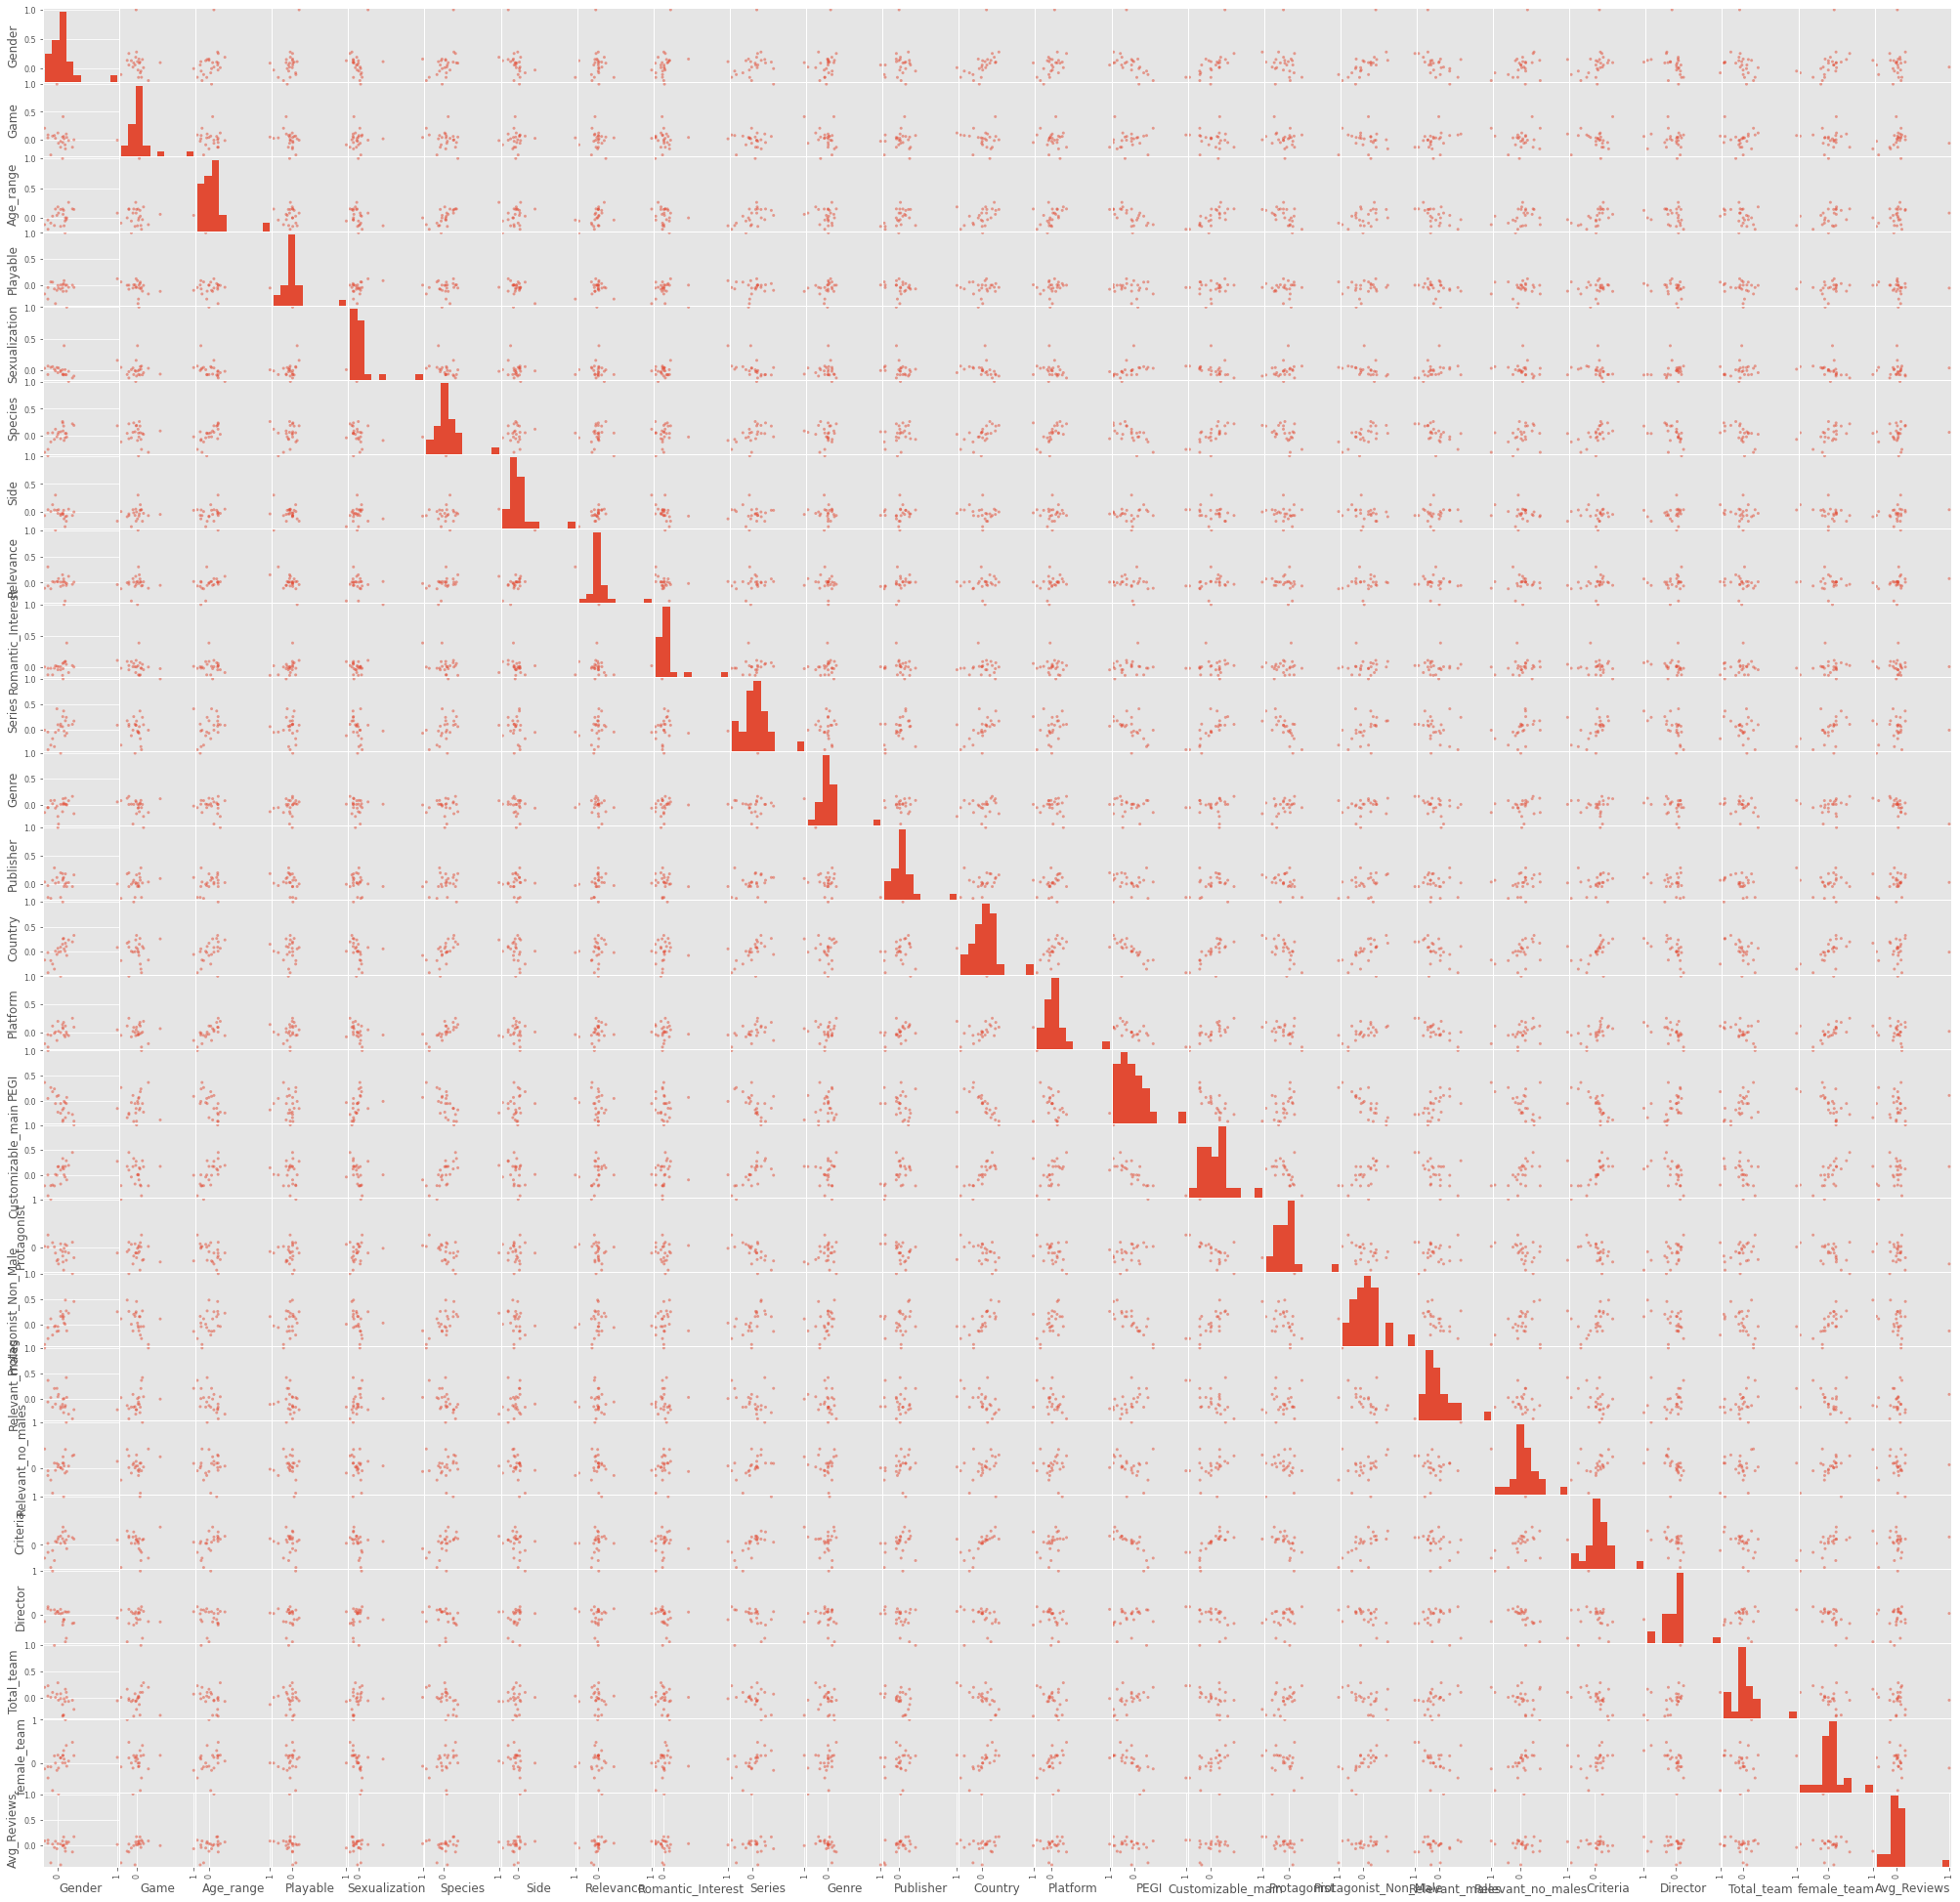

In [267]:
pd.plotting.scatter_matrix(data1.corr(),figsize=(35,35))


In [271]:
#Classification using Logistic Regression without PCA 
features_to_be_used=data1.drop(columns=['Relevance'])
target_label=data1['Relevance']
x_train,x_test,y_train,y_test=train_test_split(features_to_be_used,target_label,test_size=0.2)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
logisticReg=LogisticRegression(solver='liblinear')
model=logisticReg.fit(x_train,y_train)
model.predict(x_train)
model.predict(x_test)
logistic_score= model.score(x_test,y_test)
logistic_error=1-logistic_score
#test error of Logistic regression model
print("Test score of the model is",logistic_score)
print("Test Logistic error is",logistic_error)

Test score of the model is 0.609375
Test Logistic error is 0.390625


In [275]:
#Linear Discriminant Analysis for Classification without PCA
# Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis()
model=lda.fit(x_train,y_train)
model.predict(x_train)
model.predict(x_test)
lda_score=model.score(x_test,y_test)
lda_error=1-lda_score
print("Test LDA score is",lda_score)
#g test error of LDA model
print("Test LDA error is",lda_error)

Test LDA score is 0.5859375
Test LDA error is 0.4140625


In [281]:
# KNN for Classification without PCA
knn_score=[]
knn_error=[]
for i in range(1,27):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn.predict(x_train)
    y_prediction=knn.predict(x_test)
    score_val=knn.score(x_test,y_test)
    knn_score.append(score_val)
    knn_error.append(1-score_val)
#f - Test error of KNN model
print("Test KNN score is",np.max(knn_score))
print("Test KNN Error is",np.min(knn_error))

Test KNN score is 0.5546875
Test KNN Error is 0.4453125


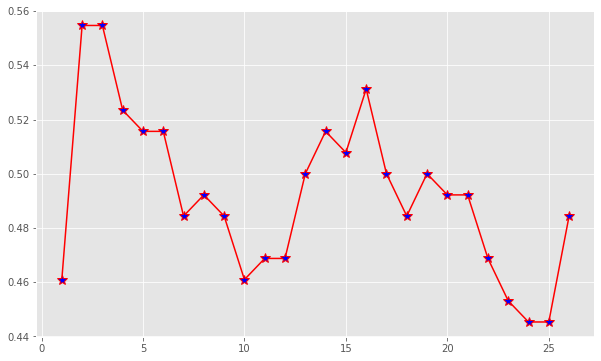

In [282]:
plt.figure(figsize=(10,6))
plt.plot(range(1,27),knn_score,color = 'red',linestyle='solid', 
         marker='*',mfc='blue',markersize=10)
plt.show()

This depicts that for k=5 the value the KNN starts performing with higher accuracy thus this could be considered as the best performing value of k for the range of k taken.

In [283]:
x=data1.drop(columns=['Relevance'])
Y=data1['Relevance']
X_train, X_test, Y_train, Y_test= train_test_split(features_to_be_used,target_label, test_size=0.2,random_state=40)

In [284]:
#Random Forest Classifier without PCA
no_of_trees=[10,50,100,150]

for trees in no_of_trees:
    result_test=[]
    result_train=[]
    rf = RandomForestClassifier(n_estimators=trees,max_depth=6,random_state=42,max_samples=267)
    rf.fit(X_train, Y_train)
    
    prediction_train = rf.predict(X_train)
    prediction_test = rf.predict(X_test)

    f1 = f1_score(Y_test, prediction_test,average='macro')
    auc_score=roc_auc_score(Y_test, rf.predict_proba(X_test), average='macro',multi_class='ovr')
    train_predicted =rf.predict_proba(X_train)
    test_predicted=rf.predict_proba(X_test)
    train_loss = log_loss(Y_train, train_predicted)
    test_loss = log_loss(Y_test,test_predicted )
    
    acc = accuracy_score(Y_test,prediction_test)
    print("Evaluation Metrics for number of trees", trees)
    print('Test accuracy is', acc)
    print('Test Error is',1-acc)
    print('F1 score of test is', f1)
    print('AUC test score', auc_score)  
    print('log loss of training is', train_loss)
    print('log loss of testing is', test_loss)

Evaluation Metrics for number of trees 10
Test accuracy is 0.65625
Test Error is 0.34375
F1 score of test is 0.35321397756686795
AUC test score 0.7016514822678276
log loss of training is 0.8242657290356977
log loss of testing is 1.0841244468685285
Evaluation Metrics for number of trees 50
Test accuracy is 0.6875
Test Error is 0.3125
F1 score of test is 0.40620487747321227
AUC test score 0.8070008410175822
log loss of training is 0.7844515249787568
log loss of testing is 1.0014891063930953
Evaluation Metrics for number of trees 100
Test accuracy is 0.7109375
Test Error is 0.2890625
F1 score of test is 0.42524069737184494
AUC test score 0.8137788412044545
log loss of training is 0.785724488816887
log loss of testing is 1.002555620000833
Evaluation Metrics for number of trees 150
Test accuracy is 0.7109375
Test Error is 0.2890625
F1 score of test is 0.42524069737184494
AUC test score 0.8264636371150709
log loss of training is 0.7868265594318966
log loss of testing is 1.0021524162049174


Comparitively RandomForest Classifier with no of trees as 100 performs better than all the other models

#### PCA Performance

In [285]:
from sklearn.decomposition import PCA
components = 14
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(scaled)

PCA(n_components=14)

In [286]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[15.14498695  9.00154279  8.75351132  6.8008193   6.31004521  5.85302613
  5.56027859  4.89681044  4.51307377  4.03427324  3.82099957  3.23970361
  2.90987321  2.68886885]



In [287]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[15.14498695 24.14652974 32.90004106 39.70086035 46.01090556 51.86393169
 57.42421028 62.32102072 66.83409449 70.86836773 74.6893673  77.92907091
 80.83894412 83.52781298]



Cumulative Variances (Percentage):
[15.14498695 24.14652974 32.90004106 39.70086035 46.01090557 51.8639317
 57.42421036 62.3210208  66.83409462 70.86836796 74.68936753 77.92907225
 80.8389459  83.52781533]
Number of components: 14


Text(0, 0.5, 'Explained variance (%)')

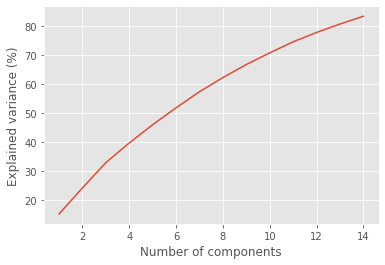

In [288]:
#Components that explain variance above 70%
ca = PCA(n_components = 0.70)
pca.fit(scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [289]:
pca_components = abs(pca.components_)
print(pca_components)

[[1.86450572e-01 3.16080924e-03 1.50058331e-01 8.22076951e-03
  6.85988613e-02 1.93881508e-01 5.24136224e-02 3.15637237e-02
  2.52724355e-02 2.67621921e-01 1.84331205e-02 1.11574199e-01
  2.98993558e-01 1.45876524e-01 3.55761723e-01 3.21060664e-01
  2.19915709e-01 3.00969578e-01 1.94375711e-01 2.08072808e-01
  2.83404162e-01 2.31010964e-01 1.64654207e-01 2.99013130e-01
  3.16846762e-02]
 [4.52032088e-02 2.04883320e-01 1.65761296e-01 1.02678794e-01
  1.33811058e-02 2.21478945e-01 1.33191545e-01 9.48233269e-02
  1.03164223e-01 1.30978780e-01 6.78871955e-02 6.57959399e-02
  7.30463419e-02 1.54773490e-01 1.39294160e-01 1.94506831e-02
  1.61632517e-01 9.56775073e-02 4.87952910e-01 4.87063452e-01
  3.62011714e-02 3.91363228e-01 1.94974097e-01 2.21017669e-01
  6.51225187e-02]
 [1.21674778e-01 2.87477185e-01 1.88540163e-01 2.25472191e-01
  3.81462933e-02 7.65878513e-02 2.26515588e-01 2.49776539e-01
  1.24969261e-01 1.65940469e-01 3.06098445e-01 2.15162076e-01
  2.86711940e-02 4.43759810e-03 1.

In [290]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {data1.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['PEGI', 'Customizable_main', 'Protagonist_Non_Male', 'female_team']
Component 1: ['Relevant_males', 'Relevant_no_males', 'Director', 'Species']
Component 2: ['Protagonist', 'Avg_Reviews', 'Genre', 'Protagonist_Non_Male']
Component 3: ['Total_team', 'Playable', 'Side', 'Romantic_Interest']
Component 4: ['Genre', 'Series', 'Avg_Reviews', 'Publisher']
Component 5: ['Publisher', 'Total_team', 'Game', 'Avg_Reviews']
Component 6: ['Sexualization', 'Romantic_Interest', 'Relevance', 'Total_team']
Component 7: ['Species', 'Criteria', 'Gender', 'Platform']
Component 8: ['Criteria', 'Protagonist', 'Avg_Reviews', 'PEGI']
Component 9: ['Platform', 'Playable', 'Publisher', 'Country']
Component 10: ['Age_range', 'Customizable_main', 'Side', 'Species']
Component 11: ['Game', 'Genre', 'Country', 'Age_range']
Component 12: ['Gender', 'Relevance', 'Species', 'Protagonist_Non_Male']
Component 13: ['Side', 'Romantic_Interest', 'Sexualization', '

In [332]:
#After PCA (Logistic Regression)
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression()
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [333]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(features_to_be_used, target_label, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=42)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)
log_regress_model.score(X_test,y_test)

0.515625

In [334]:
#After PCA (LinearDiscriminantAnalysis)

In [335]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LinearDiscriminantAnalysis()
lda_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [336]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(features_to_be_used, target_label, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=42)
# train the model using the PCA components
lda_regress_model.fit(X_train,y_train)
print('Test Score is',lda_regress_model.score(X_test,y_test))

Test Score is 0.5208333333333334


In [337]:
#After PCA (KNN)
for i in range(1,20):
    _sc = StandardScaler()
    _pca = PCA(n_components = components)
    _model = KNeighborsClassifier(n_neighbors=i)
    knn_model = Pipeline([
        ('std_scaler', _sc),
        ('pca', _pca),
        ('regressor', _model)
    ])
    X_train, X_test, y_train, y_test = \
        train_test_split(features_to_be_used, target_label, 
                         test_size=0.3,
                         shuffle=True, 
                         random_state=42)
# train the model using the PCA components
    knn_model.fit(X_train,y_train)
    print('Test Score is',knn_model.score(X_test,y_test))

Test Score is 0.5052083333333334
Test Score is 0.5416666666666666
Test Score is 0.5572916666666666
Test Score is 0.546875
Test Score is 0.5364583333333334
Test Score is 0.5104166666666666
Test Score is 0.5208333333333334
Test Score is 0.5052083333333334
Test Score is 0.5260416666666666
Test Score is 0.5104166666666666
Test Score is 0.5
Test Score is 0.5208333333333334
Test Score is 0.515625
Test Score is 0.4947916666666667
Test Score is 0.4947916666666667
Test Score is 0.46875
Test Score is 0.484375
Test Score is 0.4583333333333333
Test Score is 0.4791666666666667


In [338]:
#After PCA (Random Forests)
no_of_trees=[10,50,100,150,200]
for i in no_of_trees:
    _sc = StandardScaler()
    _pca = PCA(n_components = components)
    _model =     rf = RandomForestClassifier(n_estimators=i,max_depth=6,random_state=42,max_samples=267)
    rf_model = Pipeline([
        ('std_scaler', _sc),
        ('pca', _pca),
        ('regressor', _model)
    ])
    X_train, X_test, y_train, y_test = \
        train_test_split(features_to_be_used, target_label, 
                         test_size=0.3,
                         shuffle=True, 
                         random_state=42)
# train the model using the PCA components
    rf_model.fit(X_train,y_train)
    print('Test Score is',rf_model.score(X_test,y_test))

Test Score is 0.5625
Test Score is 0.5625
Test Score is 0.5729166666666666
Test Score is 0.5729166666666666
Test Score is 0.5677083333333334
